In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


### Drop unnecessary columns

In [6]:
unnecessary_col = ['PassengerId', 'Cabin', 'Ticket', 'Name']

df.drop(unnecessary_col, axis =1, inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


### Converted the object value

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

sex_converted = label_encoder.fit_transform(df['Sex'])
print(label_encoder.classes_)
print(sex_converted)

print('---------')
embarked_converted = label_encoder.fit_transform(df['Embarked'])
print(label_encoder.classes_)
print(embarked_converted)

['female' 'male']
[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 1 0 1 

In [10]:
df_converted = df.copy()

In [11]:
df_converted.Sex = sex_converted
df_converted.Embarked = embarked_converted

In [12]:
df_converted.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,32.699854,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,14.346821,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,32.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,45.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## Split train test dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_converted.drop('Pclass', axis =1)
y = df_converted['Pclass']

In [15]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20 , stratify = y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print('KNN score :')
survived_score_knn = accuracy_score(y_test, pred_knn, normalize=True)
survived_score_knn

KNN score :


0.8689138576779026

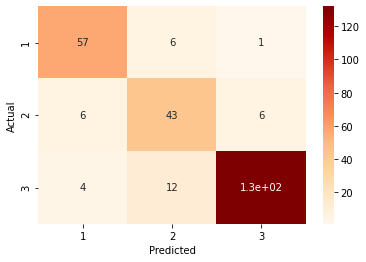

In [18]:
con_matrix = pd.crosstab(y_test, pred_knn, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(con_matrix, annot=True, cmap='OrRd')
plt.show()

In [19]:
val = np.diag(con_matrix).sum()
mis = np.array(con_matrix)
np.fill_diagonal(mis, 0)
text = f"""from above confussion, we can see that {val} value get correct prediction, 
and the others {mis.sum()} miss predicted"""

print(text)

from above confussion, we can see that 232 value get correct prediction, 
and the others 35 miss predicted


## Find the best K 

In [23]:
def find_best_k(k):
    X = df_converted.drop('Pclass', axis =1)
    y = df_converted['Pclass']
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3, random_state = 20, stratify = y)
    
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    
    survived_score_knn = accuracy_score(y_test, pred_knn, normalize=True)
    
    
    print('< K =',k, '> Cofussion Matrix')
    confusion_matrix2 = pd.crosstab(y_test2, pred_knn, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix2, annot=True, cmap='OrRd')
    plt.show()

    temp = []
    for i in confusion_matrix2.columns:
        for x in confusion_matrix2.index:
            if x == i :
                temp.append(confusion_matrix2.loc[x, i])
                
    val = sum(temp)
    
    text = f"""from above confussion matrix, we can see that {val} value get correct prediction,
and the others {len(y_test2) - val} miss predicted"""
    print(text)
    print('KNN score :', survived_score_knn)
    print('----------------------------------------\n')
    
    return survived_score_knn

< K = 1 > Cofussion Matrix


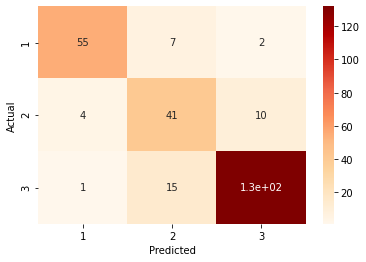

from above confussion matrix, we can see that 228 value get correct prediction,
and the others 39 miss predicted
KNN score : 0.8539325842696629
----------------------------------------

< K = 2 > Cofussion Matrix


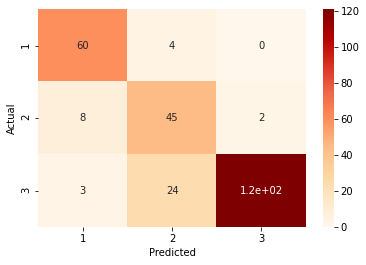

from above confussion matrix, we can see that 226 value get correct prediction,
and the others 41 miss predicted
KNN score : 0.846441947565543
----------------------------------------

< K = 3 > Cofussion Matrix


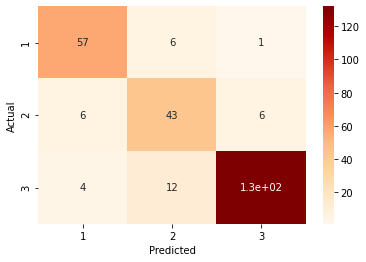

from above confussion matrix, we can see that 232 value get correct prediction,
and the others 35 miss predicted
KNN score : 0.8689138576779026
----------------------------------------

< K = 4 > Cofussion Matrix


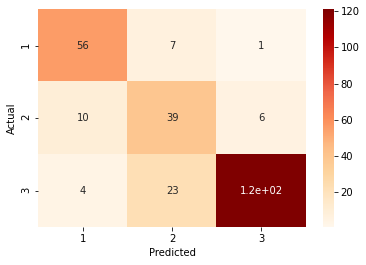

from above confussion matrix, we can see that 216 value get correct prediction,
and the others 51 miss predicted
KNN score : 0.8089887640449438
----------------------------------------

< K = 5 > Cofussion Matrix


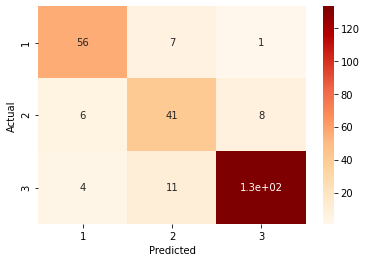

from above confussion matrix, we can see that 230 value get correct prediction,
and the others 37 miss predicted
KNN score : 0.8614232209737828
----------------------------------------

< K = 6 > Cofussion Matrix


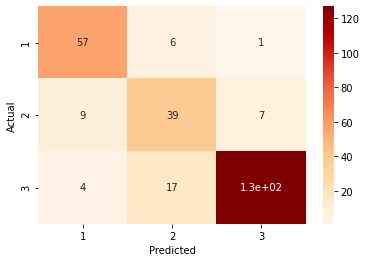

from above confussion matrix, we can see that 223 value get correct prediction,
and the others 44 miss predicted
KNN score : 0.8352059925093633
----------------------------------------

< K = 7 > Cofussion Matrix


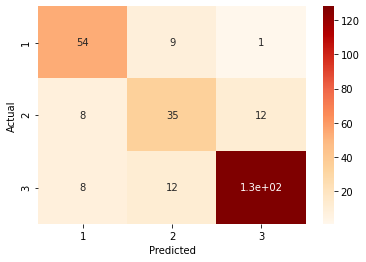

from above confussion matrix, we can see that 217 value get correct prediction,
and the others 50 miss predicted
KNN score : 0.8127340823970037
----------------------------------------

< K = 8 > Cofussion Matrix


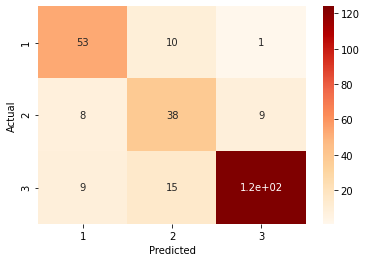

from above confussion matrix, we can see that 215 value get correct prediction,
and the others 52 miss predicted
KNN score : 0.8052434456928839
----------------------------------------

< K = 9 > Cofussion Matrix


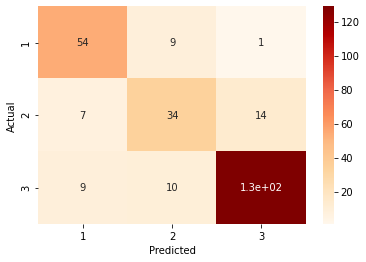

from above confussion matrix, we can see that 217 value get correct prediction,
and the others 50 miss predicted
KNN score : 0.8127340823970037
----------------------------------------

< K = 10 > Cofussion Matrix


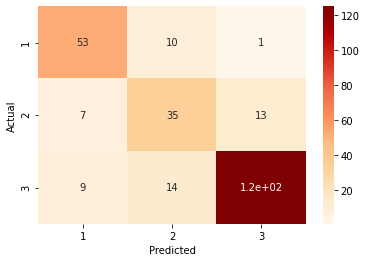

from above confussion matrix, we can see that 213 value get correct prediction,
and the others 54 miss predicted
KNN score : 0.797752808988764
----------------------------------------

< K = 11 > Cofussion Matrix


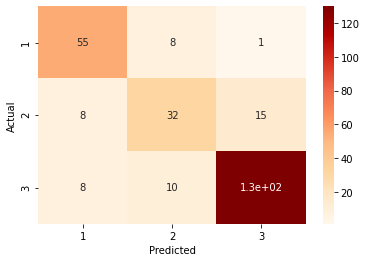

from above confussion matrix, we can see that 217 value get correct prediction,
and the others 50 miss predicted
KNN score : 0.8127340823970037
----------------------------------------

< K = 12 > Cofussion Matrix


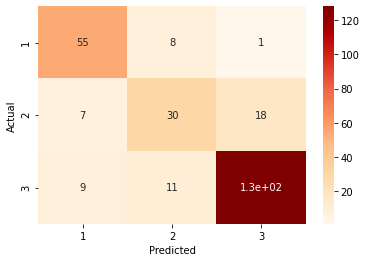

from above confussion matrix, we can see that 213 value get correct prediction,
and the others 54 miss predicted
KNN score : 0.797752808988764
----------------------------------------

< K = 13 > Cofussion Matrix


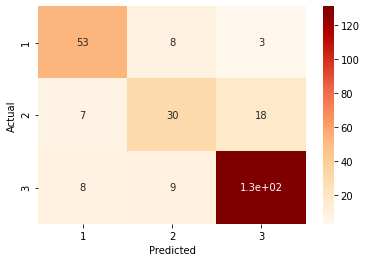

from above confussion matrix, we can see that 214 value get correct prediction,
and the others 53 miss predicted
KNN score : 0.8014981273408239
----------------------------------------

< K = 14 > Cofussion Matrix


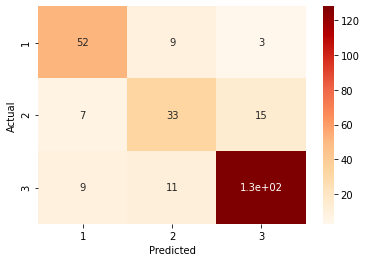

from above confussion matrix, we can see that 213 value get correct prediction,
and the others 54 miss predicted
KNN score : 0.797752808988764
----------------------------------------

< K = 15 > Cofussion Matrix


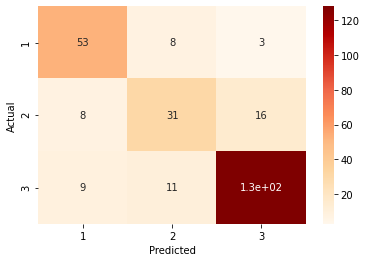

from above confussion matrix, we can see that 212 value get correct prediction,
and the others 55 miss predicted
KNN score : 0.7940074906367042
----------------------------------------

< K = 16 > Cofussion Matrix


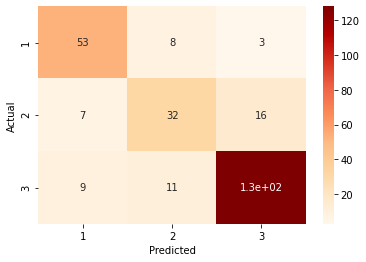

from above confussion matrix, we can see that 213 value get correct prediction,
and the others 54 miss predicted
KNN score : 0.797752808988764
----------------------------------------

< K = 17 > Cofussion Matrix


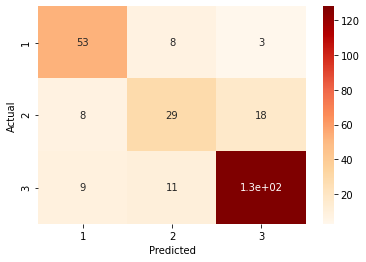

from above confussion matrix, we can see that 210 value get correct prediction,
and the others 57 miss predicted
KNN score : 0.7865168539325843
----------------------------------------

< K = 18 > Cofussion Matrix


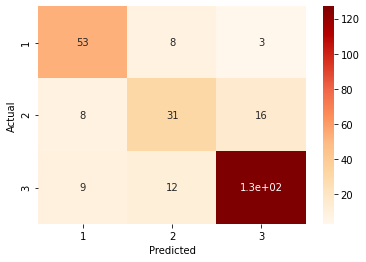

from above confussion matrix, we can see that 211 value get correct prediction,
and the others 56 miss predicted
KNN score : 0.7902621722846442
----------------------------------------

< K = 19 > Cofussion Matrix


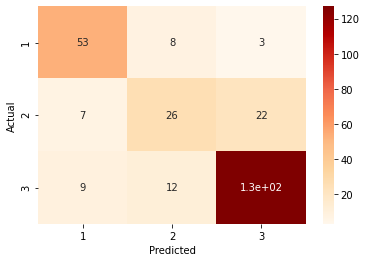

from above confussion matrix, we can see that 206 value get correct prediction,
and the others 61 miss predicted
KNN score : 0.7715355805243446
----------------------------------------

< K = 20 > Cofussion Matrix


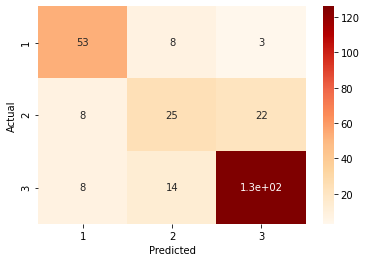

from above confussion matrix, we can see that 204 value get correct prediction,
and the others 63 miss predicted
KNN score : 0.7640449438202247
----------------------------------------

< K = 21 > Cofussion Matrix


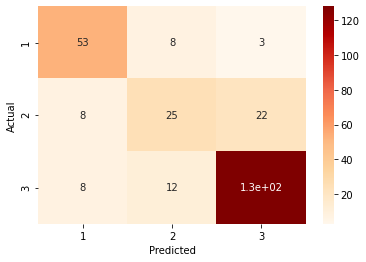

from above confussion matrix, we can see that 206 value get correct prediction,
and the others 61 miss predicted
KNN score : 0.7715355805243446
----------------------------------------

< K = 22 > Cofussion Matrix


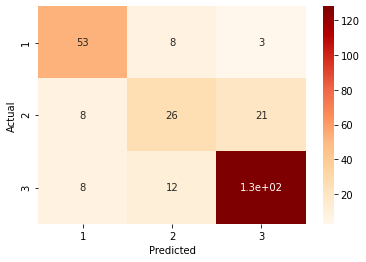

from above confussion matrix, we can see that 207 value get correct prediction,
and the others 60 miss predicted
KNN score : 0.7752808988764045
----------------------------------------

< K = 23 > Cofussion Matrix


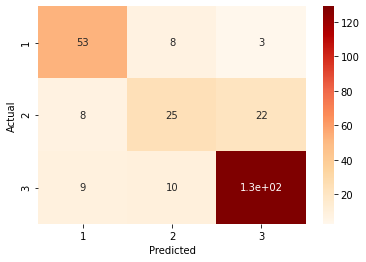

from above confussion matrix, we can see that 207 value get correct prediction,
and the others 60 miss predicted
KNN score : 0.7752808988764045
----------------------------------------

< K = 24 > Cofussion Matrix


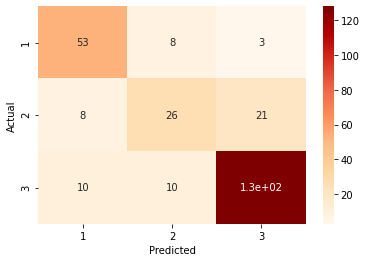

from above confussion matrix, we can see that 207 value get correct prediction,
and the others 60 miss predicted
KNN score : 0.7752808988764045
----------------------------------------

< K = 25 > Cofussion Matrix


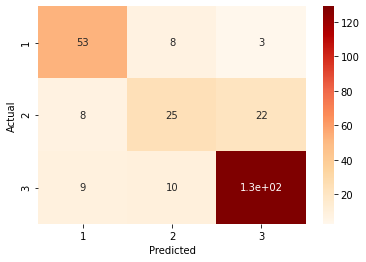

from above confussion matrix, we can see that 207 value get correct prediction,
and the others 60 miss predicted
KNN score : 0.7752808988764045
----------------------------------------

< K = 26 > Cofussion Matrix


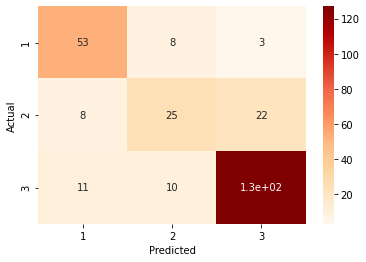

from above confussion matrix, we can see that 205 value get correct prediction,
and the others 62 miss predicted
KNN score : 0.7677902621722846
----------------------------------------

< K = 27 > Cofussion Matrix


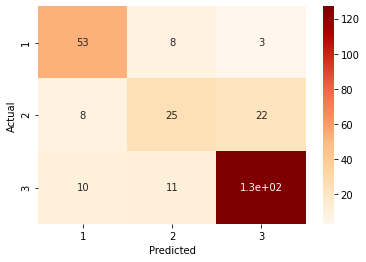

from above confussion matrix, we can see that 205 value get correct prediction,
and the others 62 miss predicted
KNN score : 0.7677902621722846
----------------------------------------

< K = 28 > Cofussion Matrix


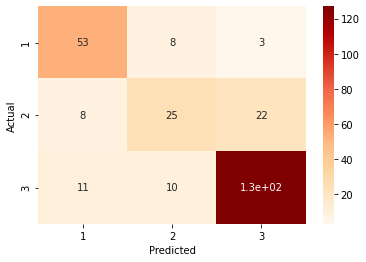

from above confussion matrix, we can see that 205 value get correct prediction,
and the others 62 miss predicted
KNN score : 0.7677902621722846
----------------------------------------

< K = 29 > Cofussion Matrix


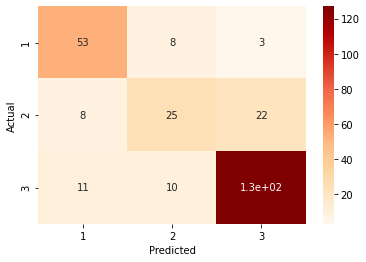

from above confussion matrix, we can see that 205 value get correct prediction,
and the others 62 miss predicted
KNN score : 0.7677902621722846
----------------------------------------

< K = 30 > Cofussion Matrix


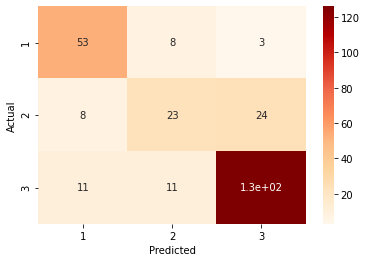

from above confussion matrix, we can see that 202 value get correct prediction,
and the others 65 miss predicted
KNN score : 0.7565543071161048
----------------------------------------

< K = 31 > Cofussion Matrix


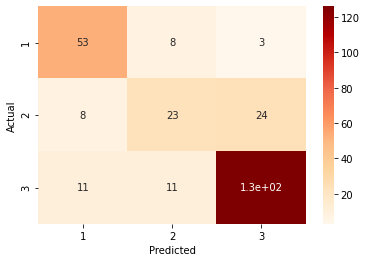

from above confussion matrix, we can see that 202 value get correct prediction,
and the others 65 miss predicted
KNN score : 0.7565543071161048
----------------------------------------

< K = 32 > Cofussion Matrix


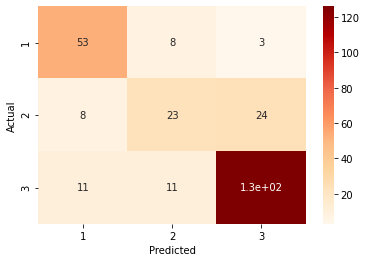

from above confussion matrix, we can see that 202 value get correct prediction,
and the others 65 miss predicted
KNN score : 0.7565543071161048
----------------------------------------

< K = 33 > Cofussion Matrix


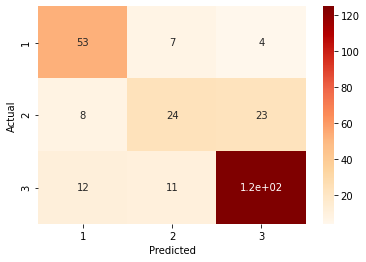

from above confussion matrix, we can see that 202 value get correct prediction,
and the others 65 miss predicted
KNN score : 0.7565543071161048
----------------------------------------

< K = 34 > Cofussion Matrix


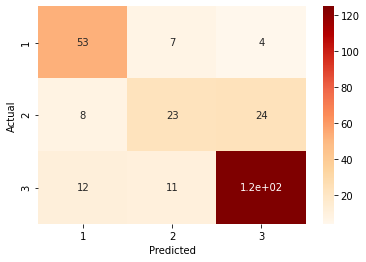

from above confussion matrix, we can see that 201 value get correct prediction,
and the others 66 miss predicted
KNN score : 0.7528089887640449
----------------------------------------

< K = 35 > Cofussion Matrix


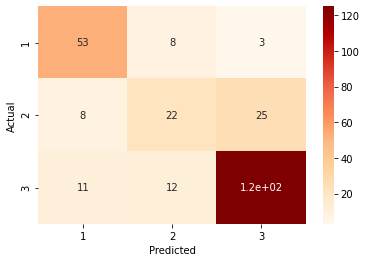

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 36 > Cofussion Matrix


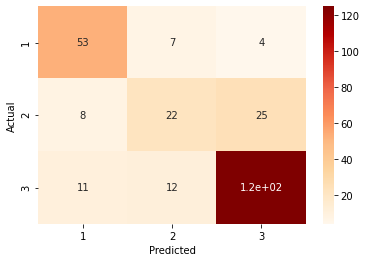

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 37 > Cofussion Matrix


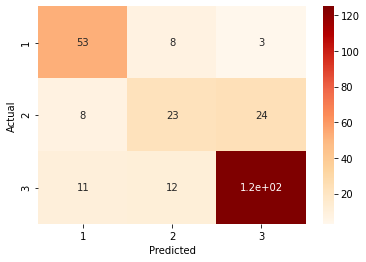

from above confussion matrix, we can see that 201 value get correct prediction,
and the others 66 miss predicted
KNN score : 0.7528089887640449
----------------------------------------

< K = 38 > Cofussion Matrix


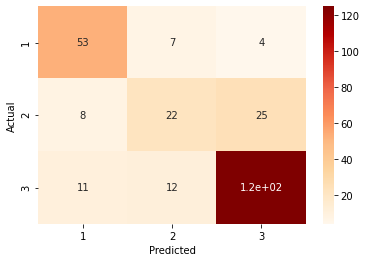

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 39 > Cofussion Matrix


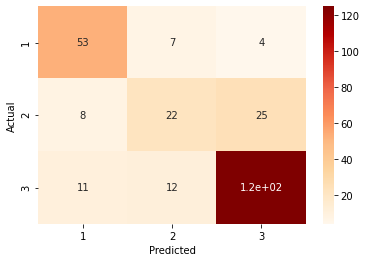

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 40 > Cofussion Matrix


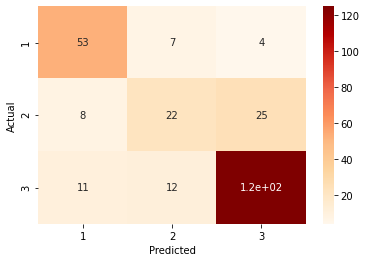

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 41 > Cofussion Matrix


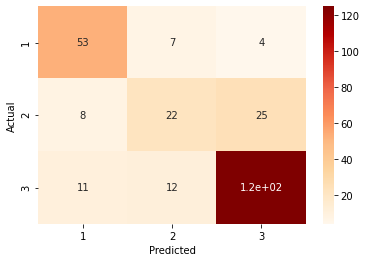

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 42 > Cofussion Matrix


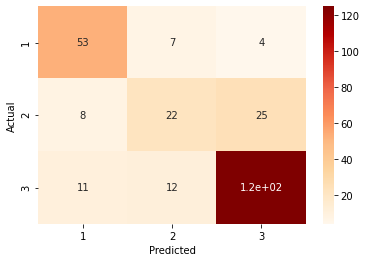

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 43 > Cofussion Matrix


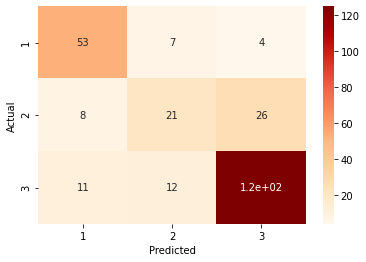

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted
KNN score : 0.7453183520599251
----------------------------------------

< K = 44 > Cofussion Matrix


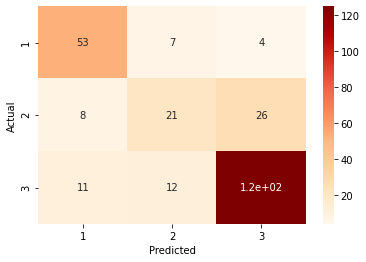

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted
KNN score : 0.7453183520599251
----------------------------------------

< K = 45 > Cofussion Matrix


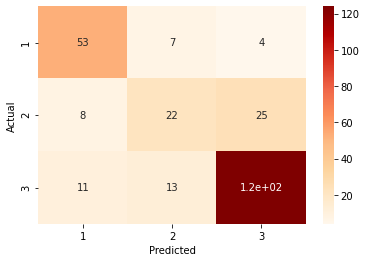

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted
KNN score : 0.7453183520599251
----------------------------------------

< K = 46 > Cofussion Matrix


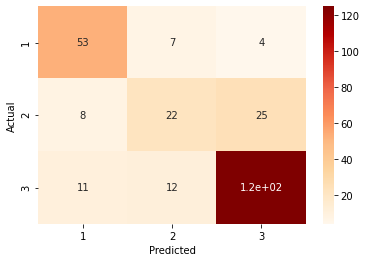

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 47 > Cofussion Matrix


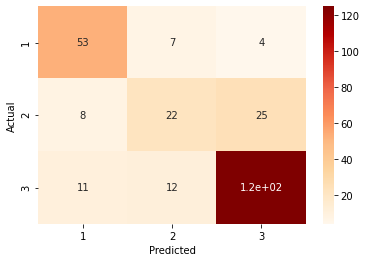

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 48 > Cofussion Matrix


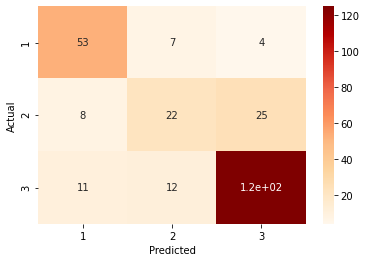

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 49 > Cofussion Matrix


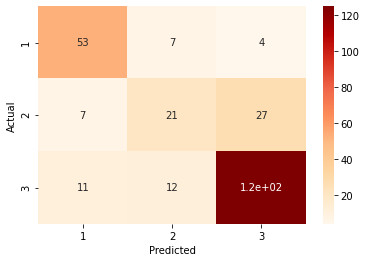

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted
KNN score : 0.7453183520599251
----------------------------------------

< K = 50 > Cofussion Matrix


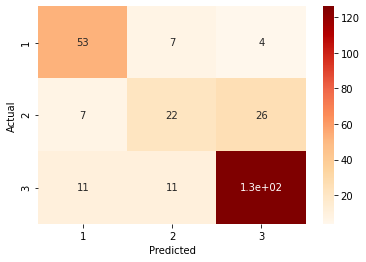

from above confussion matrix, we can see that 201 value get correct prediction,
and the others 66 miss predicted
KNN score : 0.7528089887640449
----------------------------------------

< K = 51 > Cofussion Matrix


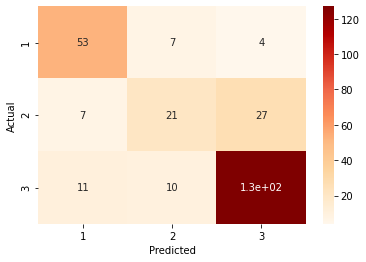

from above confussion matrix, we can see that 201 value get correct prediction,
and the others 66 miss predicted
KNN score : 0.7528089887640449
----------------------------------------

< K = 52 > Cofussion Matrix


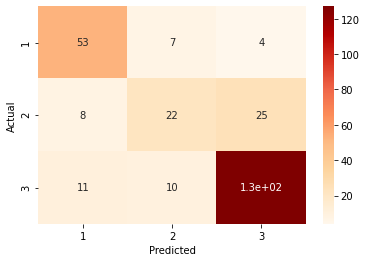

from above confussion matrix, we can see that 202 value get correct prediction,
and the others 65 miss predicted
KNN score : 0.7565543071161048
----------------------------------------

< K = 53 > Cofussion Matrix


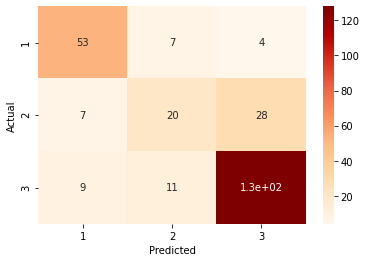

from above confussion matrix, we can see that 201 value get correct prediction,
and the others 66 miss predicted
KNN score : 0.7528089887640449
----------------------------------------

< K = 54 > Cofussion Matrix


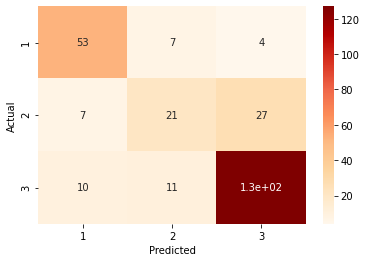

from above confussion matrix, we can see that 201 value get correct prediction,
and the others 66 miss predicted
KNN score : 0.7528089887640449
----------------------------------------

< K = 55 > Cofussion Matrix


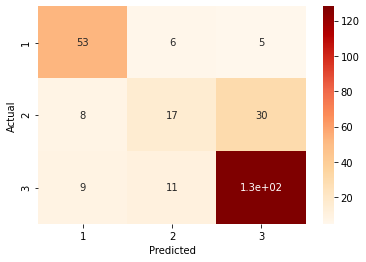

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted
KNN score : 0.7415730337078652
----------------------------------------

< K = 56 > Cofussion Matrix


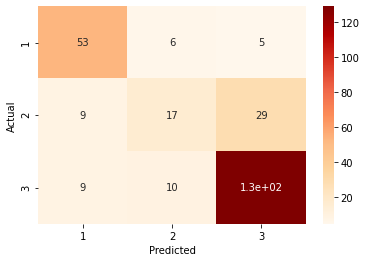

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted
KNN score : 0.7453183520599251
----------------------------------------

< K = 57 > Cofussion Matrix


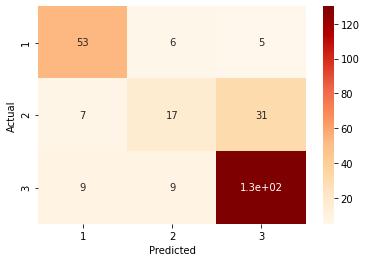

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 58 > Cofussion Matrix


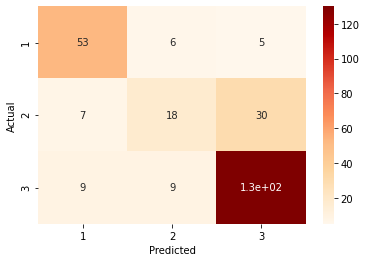

from above confussion matrix, we can see that 201 value get correct prediction,
and the others 66 miss predicted
KNN score : 0.7528089887640449
----------------------------------------

< K = 59 > Cofussion Matrix


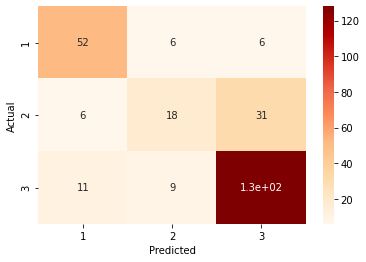

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted
KNN score : 0.7415730337078652
----------------------------------------

< K = 60 > Cofussion Matrix


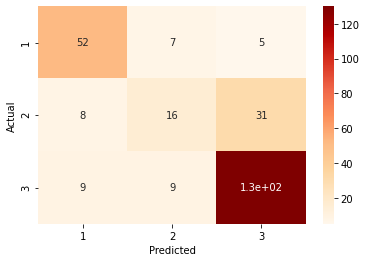

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted
KNN score : 0.7415730337078652
----------------------------------------

< K = 61 > Cofussion Matrix


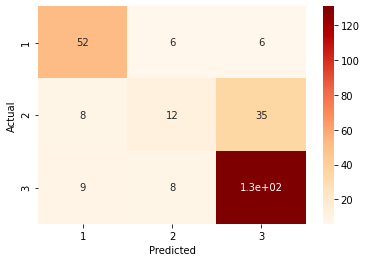

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 62 > Cofussion Matrix


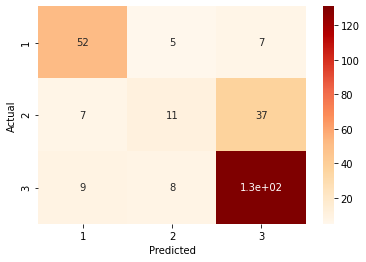

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 63 > Cofussion Matrix


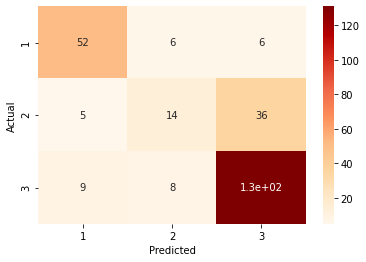

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 64 > Cofussion Matrix


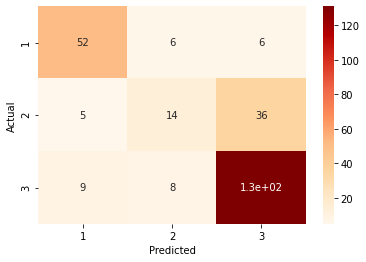

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 65 > Cofussion Matrix


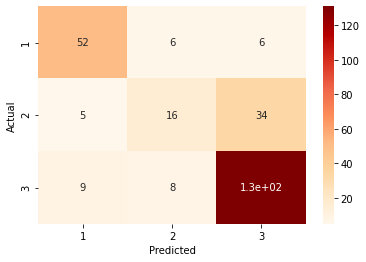

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted
KNN score : 0.7453183520599251
----------------------------------------

< K = 66 > Cofussion Matrix


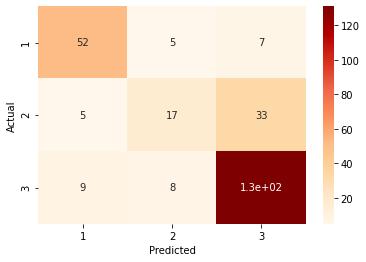

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 67 > Cofussion Matrix


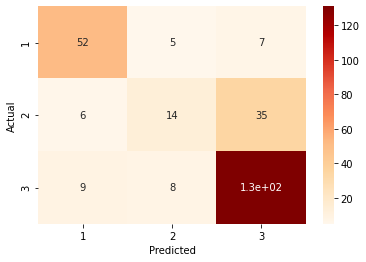

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 68 > Cofussion Matrix


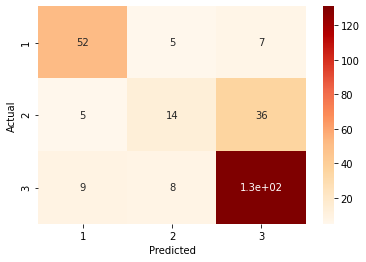

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 69 > Cofussion Matrix


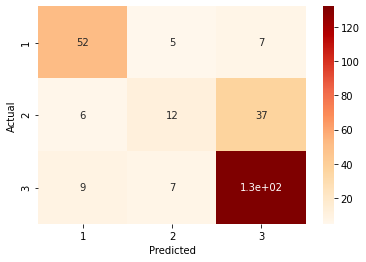

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 70 > Cofussion Matrix


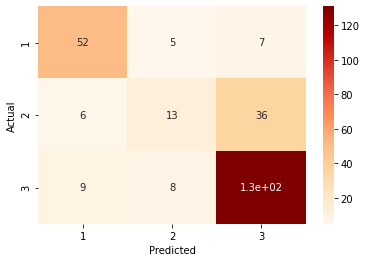

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 71 > Cofussion Matrix


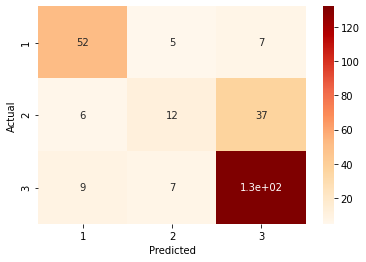

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 72 > Cofussion Matrix


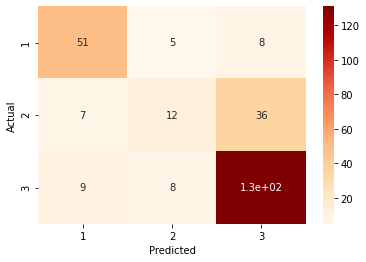

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 73 > Cofussion Matrix


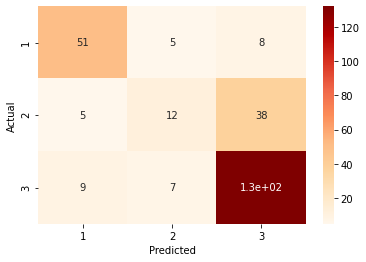

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 74 > Cofussion Matrix


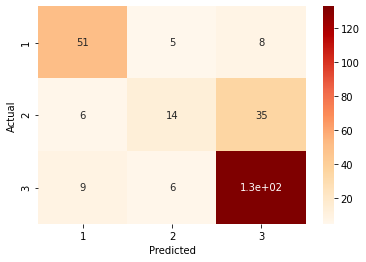

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted
KNN score : 0.7415730337078652
----------------------------------------

< K = 75 > Cofussion Matrix


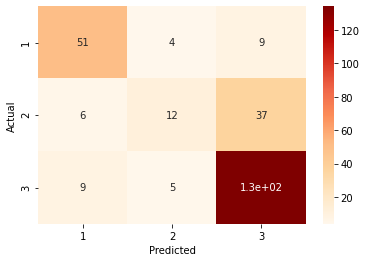

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 76 > Cofussion Matrix


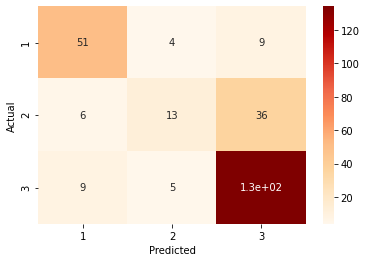

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted
KNN score : 0.7415730337078652
----------------------------------------

< K = 77 > Cofussion Matrix


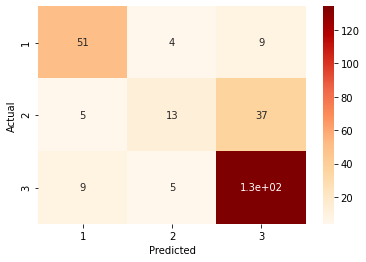

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted
KNN score : 0.7415730337078652
----------------------------------------

< K = 78 > Cofussion Matrix


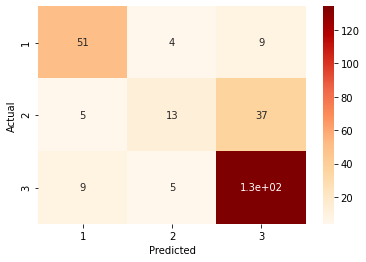

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted
KNN score : 0.7415730337078652
----------------------------------------

< K = 79 > Cofussion Matrix


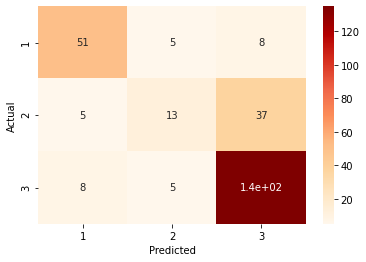

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted
KNN score : 0.7453183520599251
----------------------------------------

< K = 80 > Cofussion Matrix


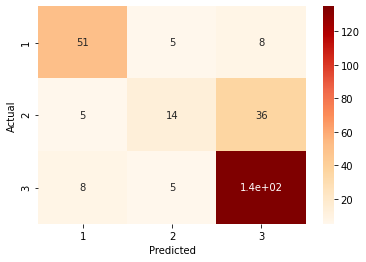

from above confussion matrix, we can see that 200 value get correct prediction,
and the others 67 miss predicted
KNN score : 0.7490636704119851
----------------------------------------

< K = 81 > Cofussion Matrix


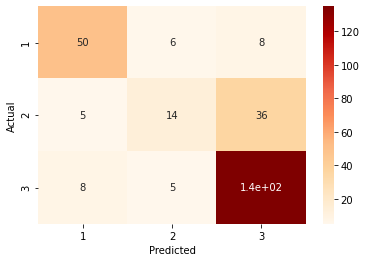

from above confussion matrix, we can see that 199 value get correct prediction,
and the others 68 miss predicted
KNN score : 0.7453183520599251
----------------------------------------

< K = 82 > Cofussion Matrix


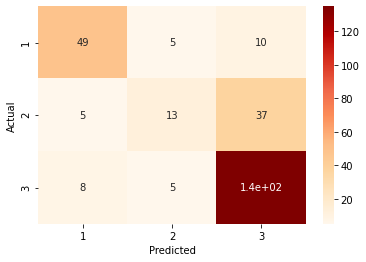

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 83 > Cofussion Matrix


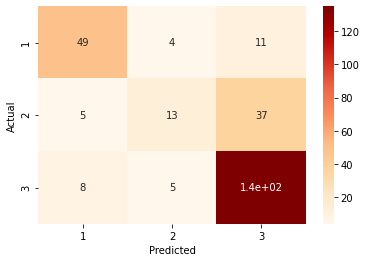

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 84 > Cofussion Matrix


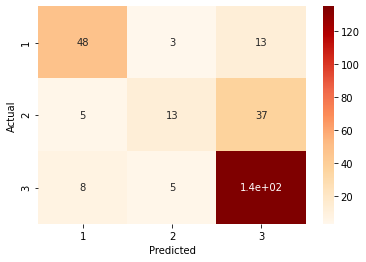

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 85 > Cofussion Matrix


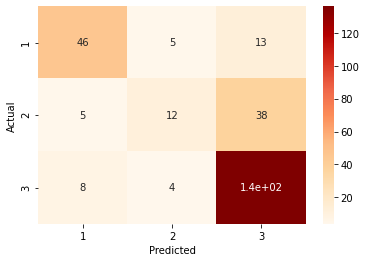

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 86 > Cofussion Matrix


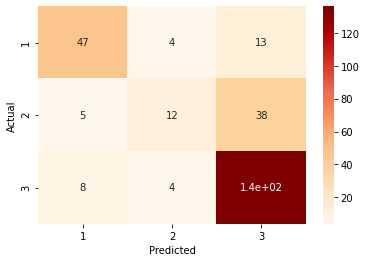

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 87 > Cofussion Matrix


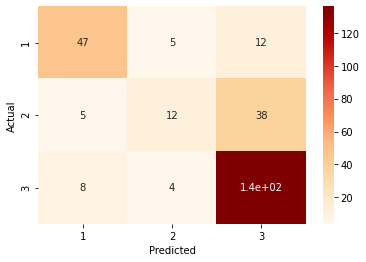

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 88 > Cofussion Matrix


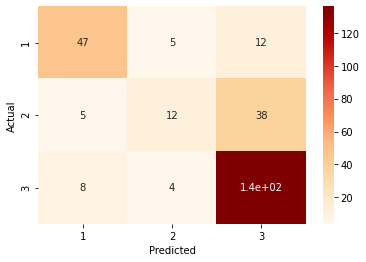

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 89 > Cofussion Matrix


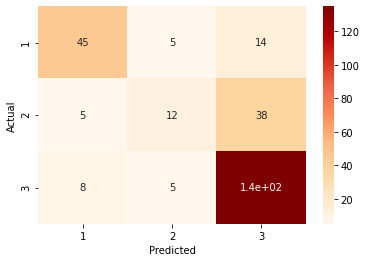

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 90 > Cofussion Matrix


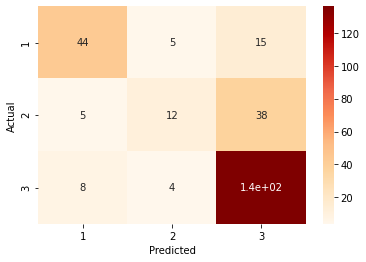

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 91 > Cofussion Matrix


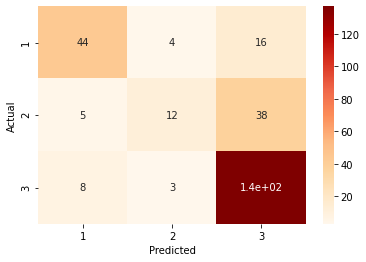

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 92 > Cofussion Matrix


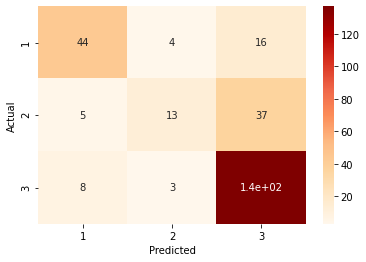

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 93 > Cofussion Matrix


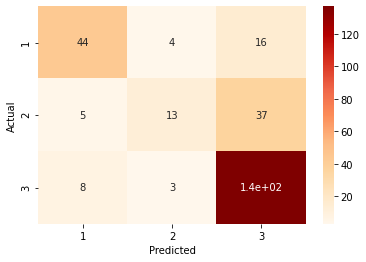

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 94 > Cofussion Matrix


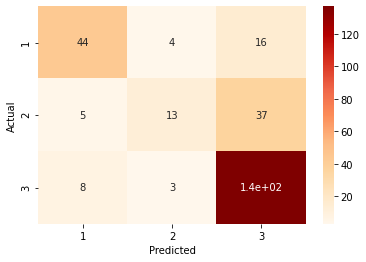

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 95 > Cofussion Matrix


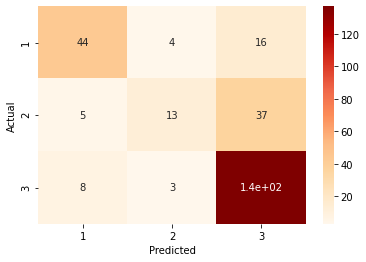

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 96 > Cofussion Matrix


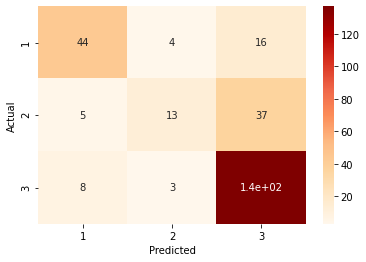

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 97 > Cofussion Matrix


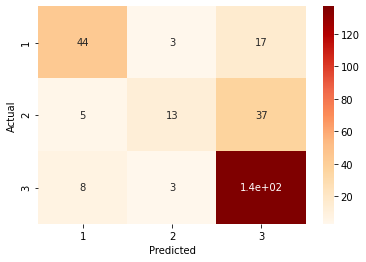

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 98 > Cofussion Matrix


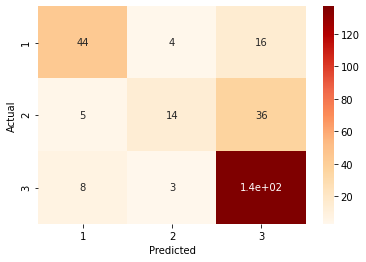

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 99 > Cofussion Matrix


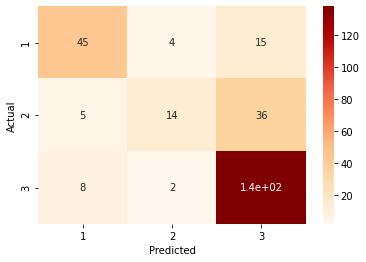

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 100 > Cofussion Matrix


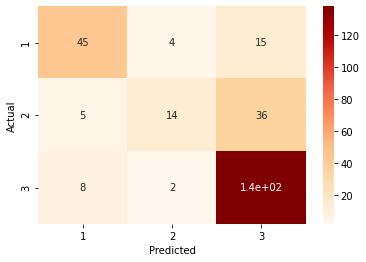

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 101 > Cofussion Matrix


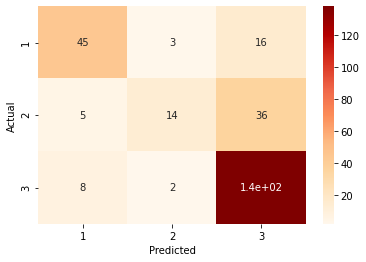

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 102 > Cofussion Matrix


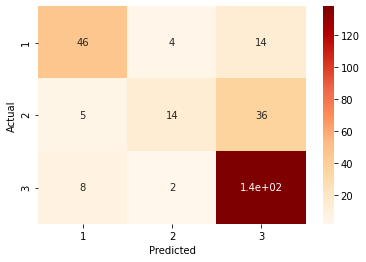

from above confussion matrix, we can see that 198 value get correct prediction,
and the others 69 miss predicted
KNN score : 0.7415730337078652
----------------------------------------

< K = 103 > Cofussion Matrix


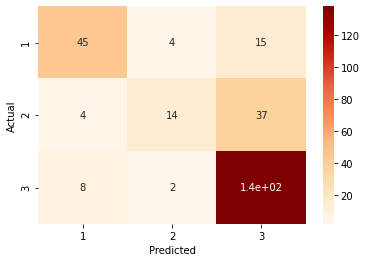

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 104 > Cofussion Matrix


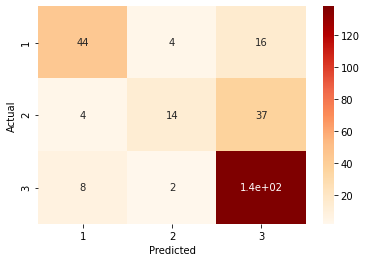

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 105 > Cofussion Matrix


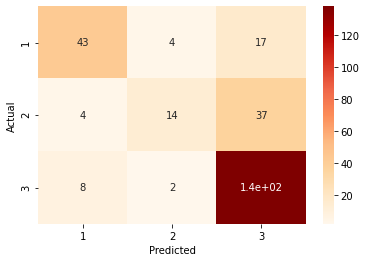

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 106 > Cofussion Matrix


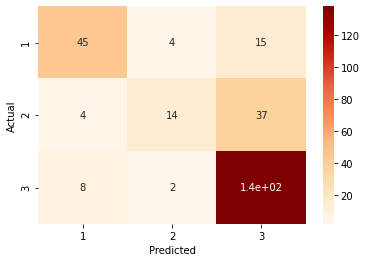

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 107 > Cofussion Matrix


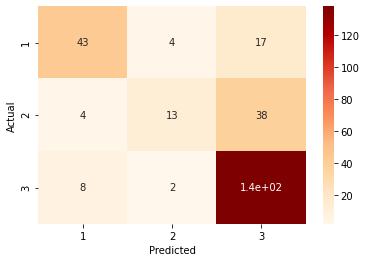

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 108 > Cofussion Matrix


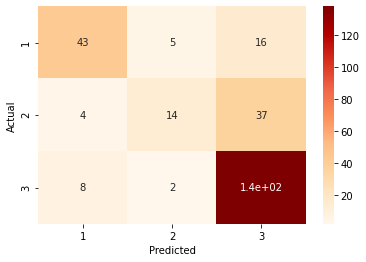

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 109 > Cofussion Matrix


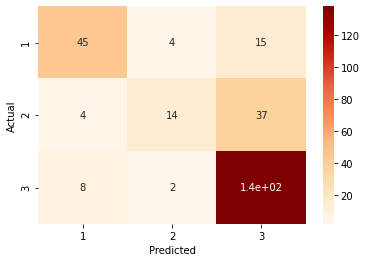

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 110 > Cofussion Matrix


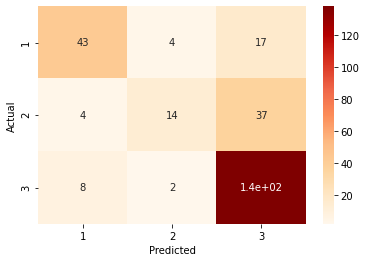

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 111 > Cofussion Matrix


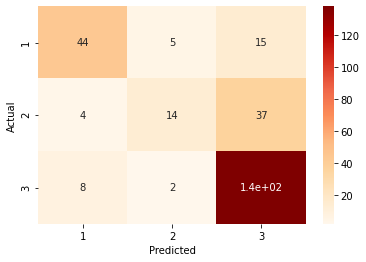

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 112 > Cofussion Matrix


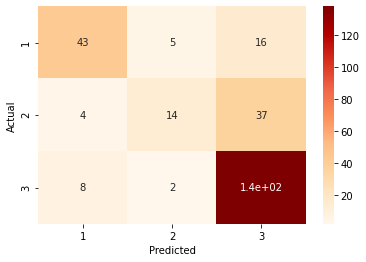

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 113 > Cofussion Matrix


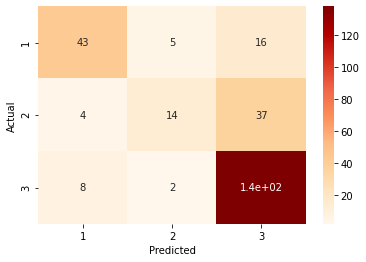

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 114 > Cofussion Matrix


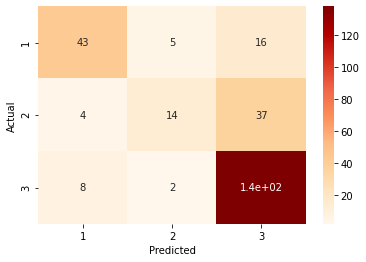

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 115 > Cofussion Matrix


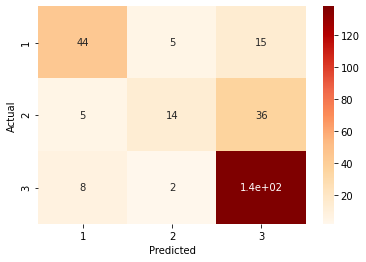

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 116 > Cofussion Matrix


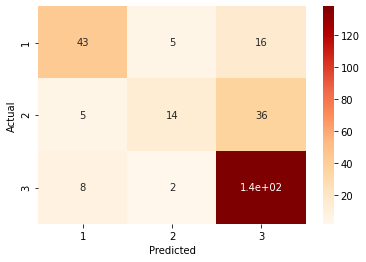

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 117 > Cofussion Matrix


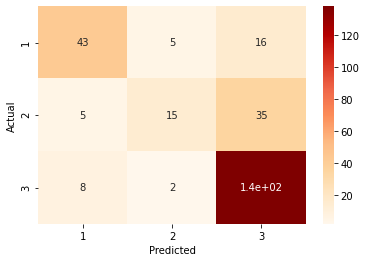

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 118 > Cofussion Matrix


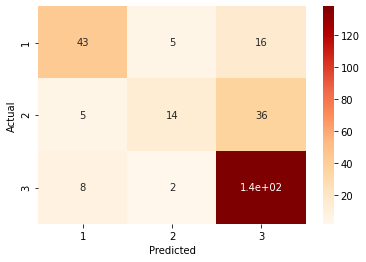

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 119 > Cofussion Matrix


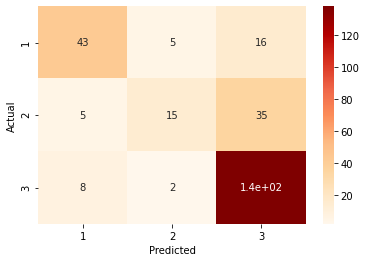

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 120 > Cofussion Matrix


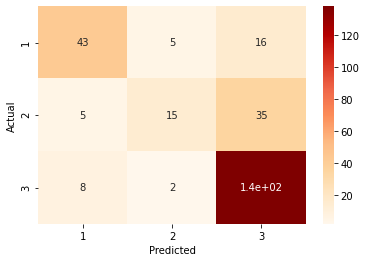

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 121 > Cofussion Matrix


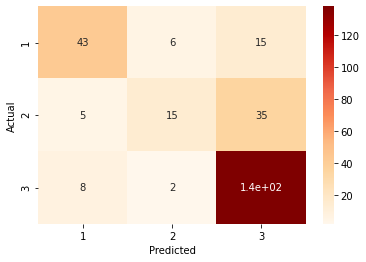

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 122 > Cofussion Matrix


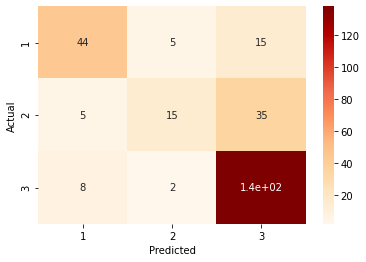

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 123 > Cofussion Matrix


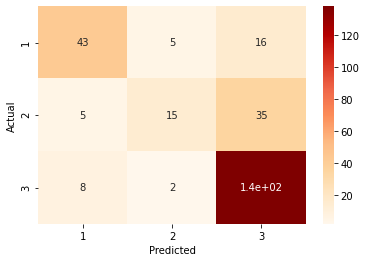

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 124 > Cofussion Matrix


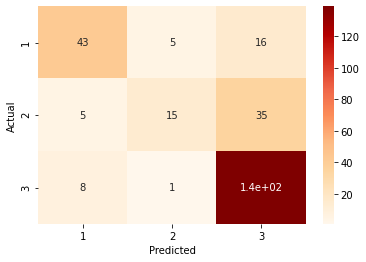

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 125 > Cofussion Matrix


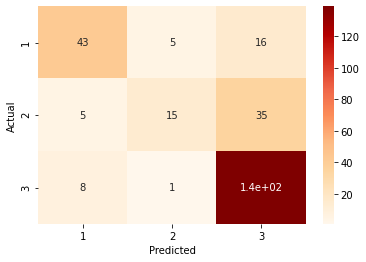

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 126 > Cofussion Matrix


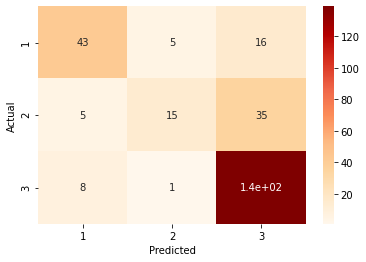

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 127 > Cofussion Matrix


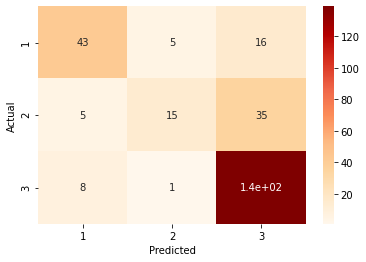

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 128 > Cofussion Matrix


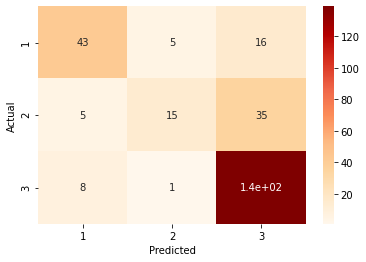

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 129 > Cofussion Matrix


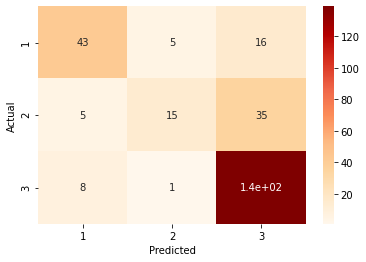

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 130 > Cofussion Matrix


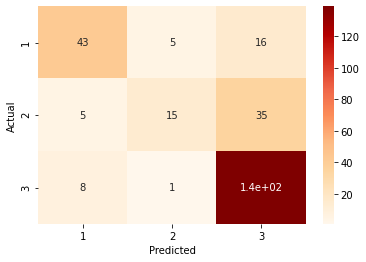

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 131 > Cofussion Matrix


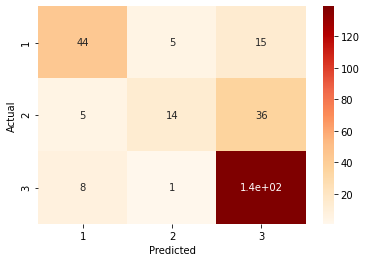

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 132 > Cofussion Matrix


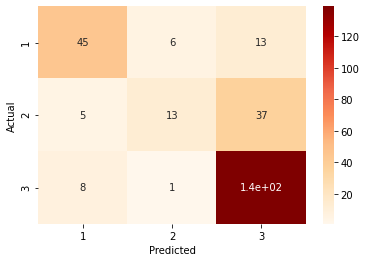

from above confussion matrix, we can see that 197 value get correct prediction,
and the others 70 miss predicted
KNN score : 0.7378277153558053
----------------------------------------

< K = 133 > Cofussion Matrix


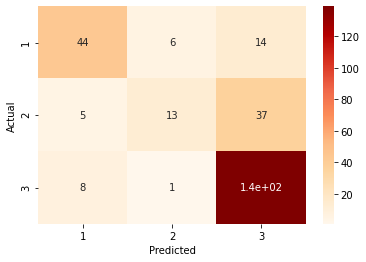

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 134 > Cofussion Matrix


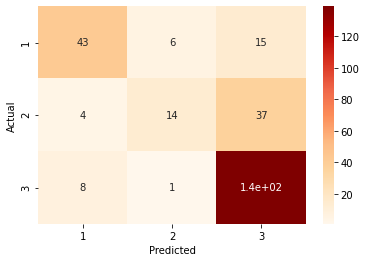

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 135 > Cofussion Matrix


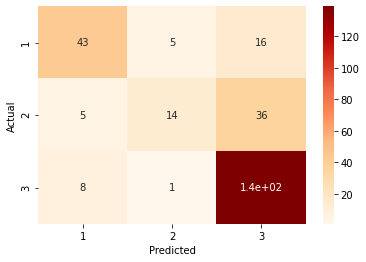

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 136 > Cofussion Matrix


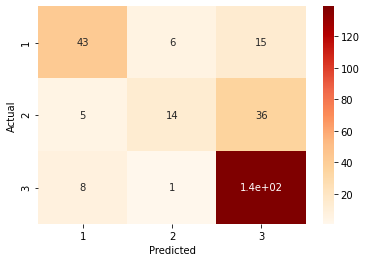

from above confussion matrix, we can see that 196 value get correct prediction,
and the others 71 miss predicted
KNN score : 0.7340823970037453
----------------------------------------

< K = 137 > Cofussion Matrix


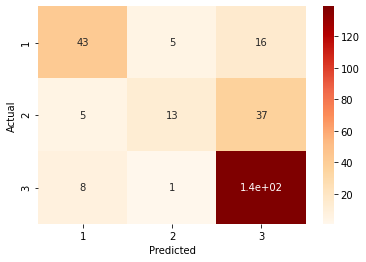

from above confussion matrix, we can see that 195 value get correct prediction,
and the others 72 miss predicted
KNN score : 0.7303370786516854
----------------------------------------

< K = 138 > Cofussion Matrix


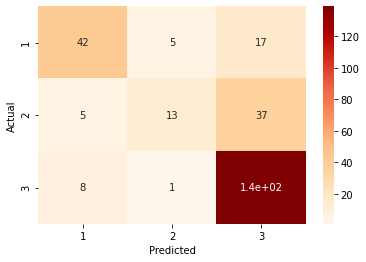

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 139 > Cofussion Matrix


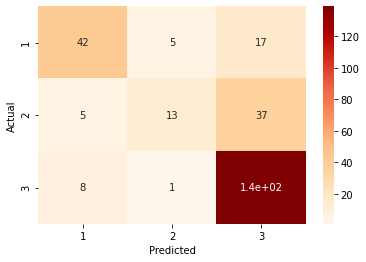

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 140 > Cofussion Matrix


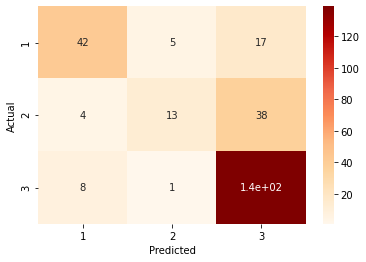

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 141 > Cofussion Matrix


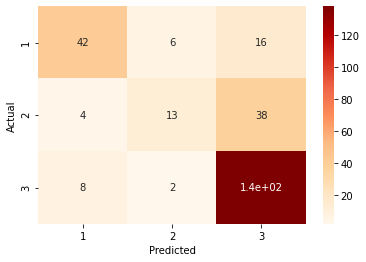

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 142 > Cofussion Matrix


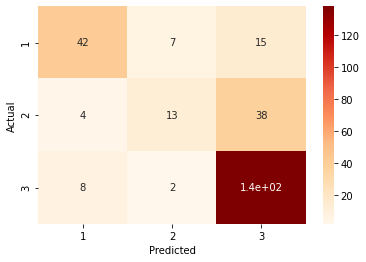

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 143 > Cofussion Matrix


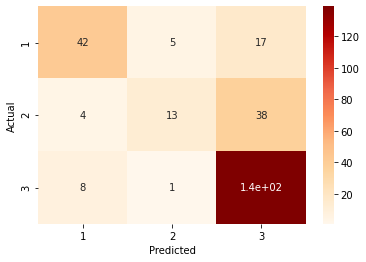

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 144 > Cofussion Matrix


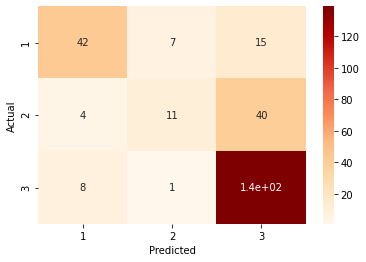

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 145 > Cofussion Matrix


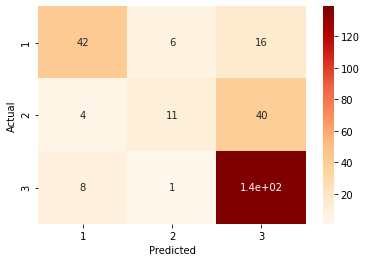

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 146 > Cofussion Matrix


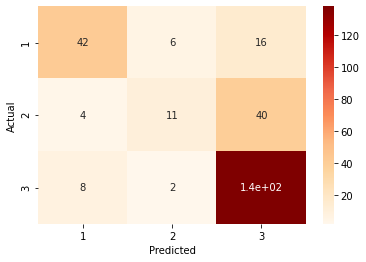

from above confussion matrix, we can see that 191 value get correct prediction,
and the others 76 miss predicted
KNN score : 0.7153558052434457
----------------------------------------

< K = 147 > Cofussion Matrix


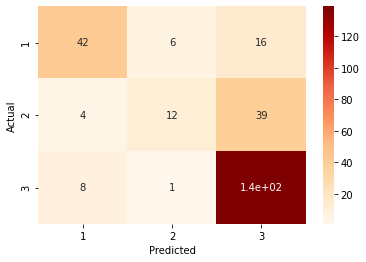

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 148 > Cofussion Matrix


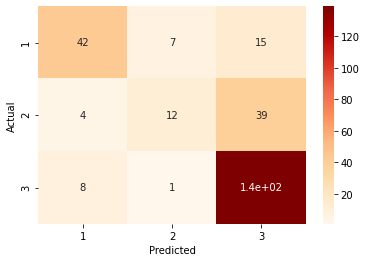

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 149 > Cofussion Matrix


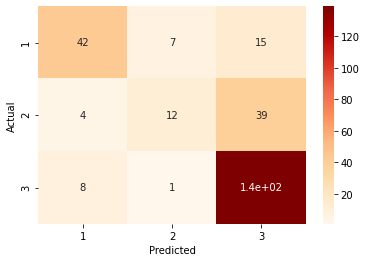

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 150 > Cofussion Matrix


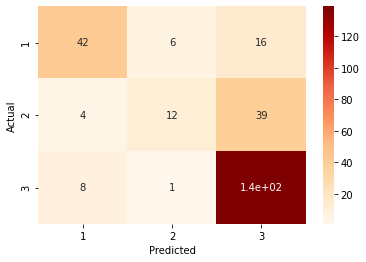

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 151 > Cofussion Matrix


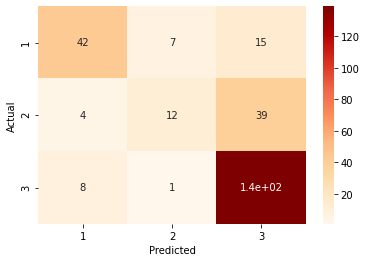

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 152 > Cofussion Matrix


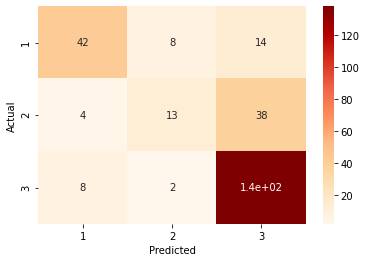

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 153 > Cofussion Matrix


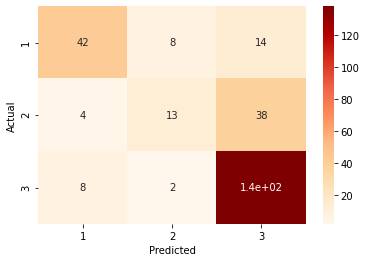

from above confussion matrix, we can see that 193 value get correct prediction,
and the others 74 miss predicted
KNN score : 0.7228464419475655
----------------------------------------

< K = 154 > Cofussion Matrix


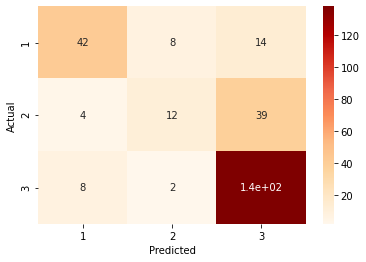

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 155 > Cofussion Matrix


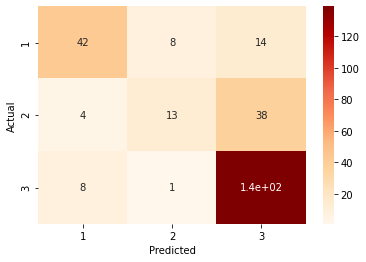

from above confussion matrix, we can see that 194 value get correct prediction,
and the others 73 miss predicted
KNN score : 0.7265917602996255
----------------------------------------

< K = 156 > Cofussion Matrix


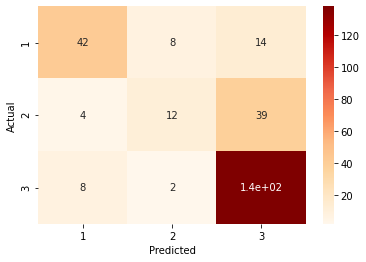

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 157 > Cofussion Matrix


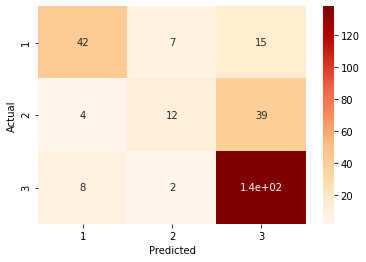

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 158 > Cofussion Matrix


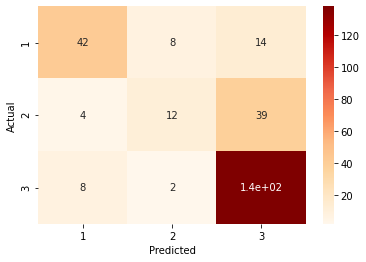

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 159 > Cofussion Matrix


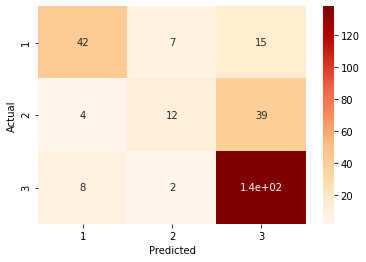

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 160 > Cofussion Matrix


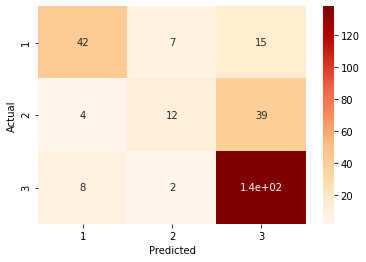

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 161 > Cofussion Matrix


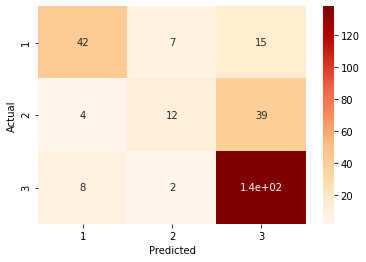

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 162 > Cofussion Matrix


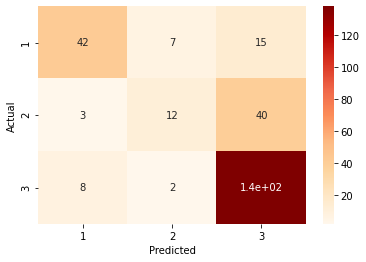

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 163 > Cofussion Matrix


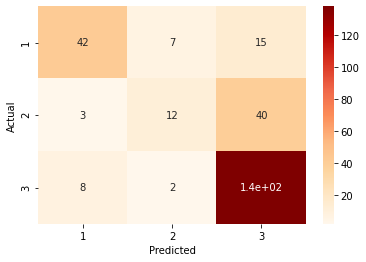

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 164 > Cofussion Matrix


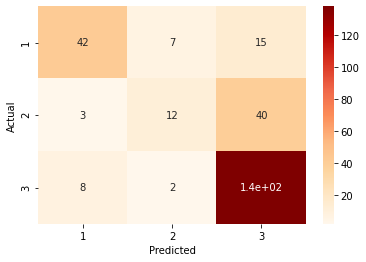

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 165 > Cofussion Matrix


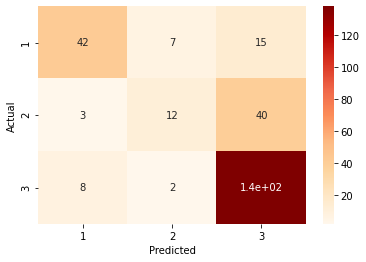

from above confussion matrix, we can see that 192 value get correct prediction,
and the others 75 miss predicted
KNN score : 0.7191011235955056
----------------------------------------

< K = 166 > Cofussion Matrix


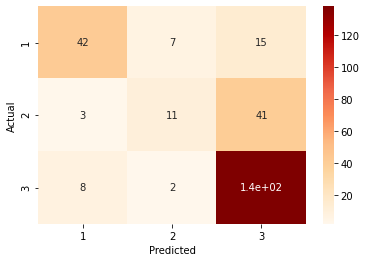

from above confussion matrix, we can see that 191 value get correct prediction,
and the others 76 miss predicted
KNN score : 0.7153558052434457
----------------------------------------

< K = 167 > Cofussion Matrix


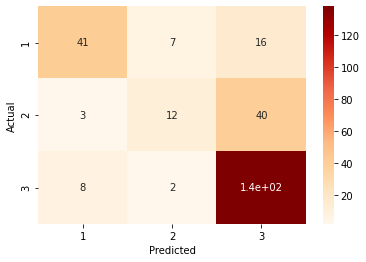

from above confussion matrix, we can see that 191 value get correct prediction,
and the others 76 miss predicted
KNN score : 0.7153558052434457
----------------------------------------

< K = 168 > Cofussion Matrix


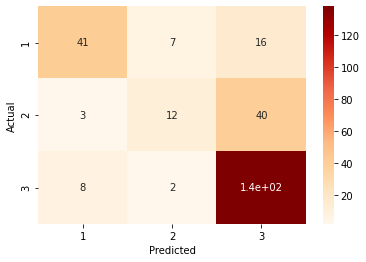

from above confussion matrix, we can see that 191 value get correct prediction,
and the others 76 miss predicted
KNN score : 0.7153558052434457
----------------------------------------

< K = 169 > Cofussion Matrix


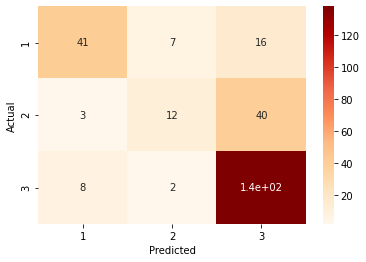

from above confussion matrix, we can see that 191 value get correct prediction,
and the others 76 miss predicted
KNN score : 0.7153558052434457
----------------------------------------

< K = 170 > Cofussion Matrix


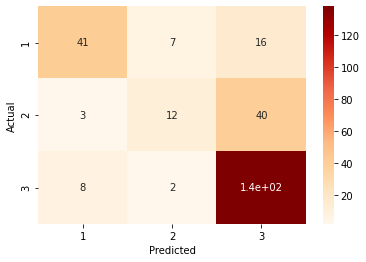

from above confussion matrix, we can see that 191 value get correct prediction,
and the others 76 miss predicted
KNN score : 0.7153558052434457
----------------------------------------

< K = 171 > Cofussion Matrix


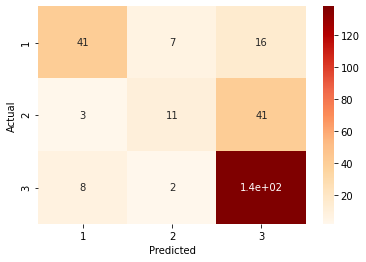

from above confussion matrix, we can see that 190 value get correct prediction,
and the others 77 miss predicted
KNN score : 0.7116104868913857
----------------------------------------

< K = 172 > Cofussion Matrix


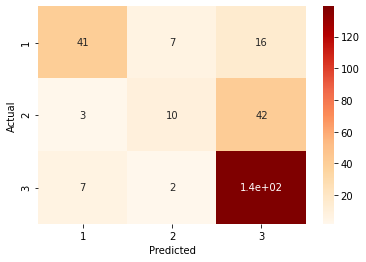

from above confussion matrix, we can see that 190 value get correct prediction,
and the others 77 miss predicted
KNN score : 0.7116104868913857
----------------------------------------

< K = 173 > Cofussion Matrix


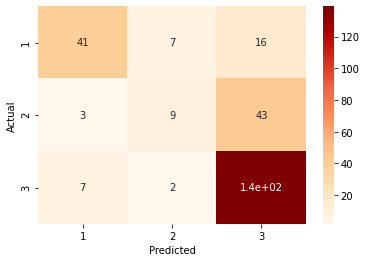

from above confussion matrix, we can see that 189 value get correct prediction,
and the others 78 miss predicted
KNN score : 0.7078651685393258
----------------------------------------

< K = 174 > Cofussion Matrix


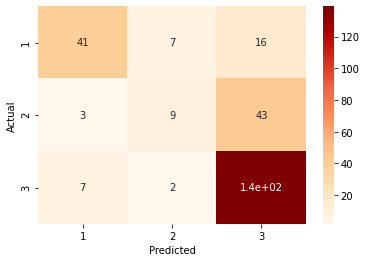

from above confussion matrix, we can see that 189 value get correct prediction,
and the others 78 miss predicted
KNN score : 0.7078651685393258
----------------------------------------

< K = 175 > Cofussion Matrix


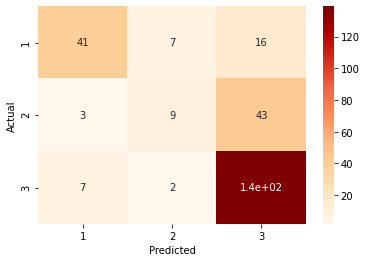

from above confussion matrix, we can see that 189 value get correct prediction,
and the others 78 miss predicted
KNN score : 0.7078651685393258
----------------------------------------

< K = 176 > Cofussion Matrix


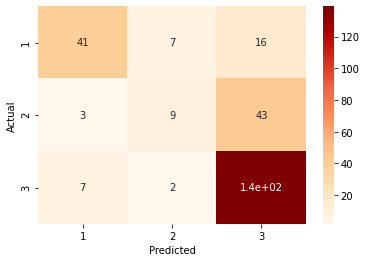

from above confussion matrix, we can see that 189 value get correct prediction,
and the others 78 miss predicted
KNN score : 0.7078651685393258
----------------------------------------

< K = 177 > Cofussion Matrix


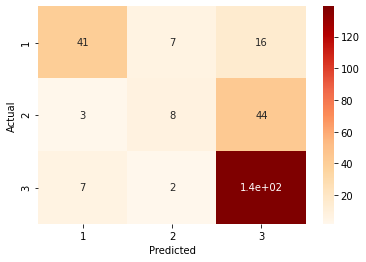

from above confussion matrix, we can see that 188 value get correct prediction,
and the others 79 miss predicted
KNN score : 0.704119850187266
----------------------------------------

< K = 178 > Cofussion Matrix


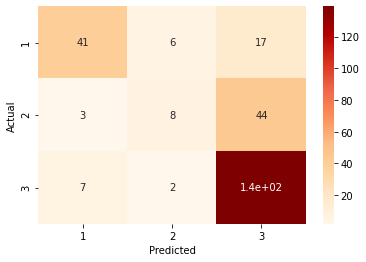

from above confussion matrix, we can see that 188 value get correct prediction,
and the others 79 miss predicted
KNN score : 0.704119850187266
----------------------------------------

< K = 179 > Cofussion Matrix


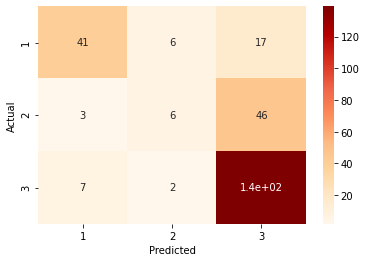

from above confussion matrix, we can see that 186 value get correct prediction,
and the others 81 miss predicted
KNN score : 0.6966292134831461
----------------------------------------

< K = 180 > Cofussion Matrix


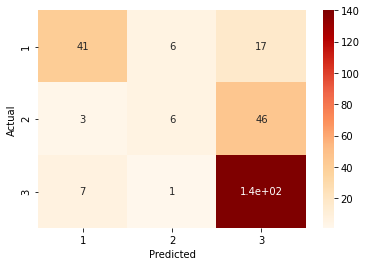

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 181 > Cofussion Matrix


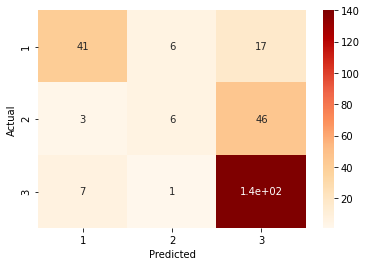

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 182 > Cofussion Matrix


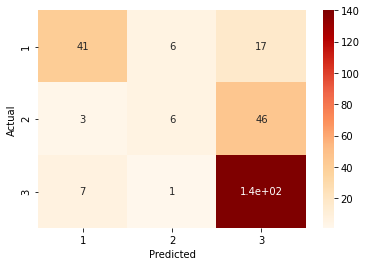

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 183 > Cofussion Matrix


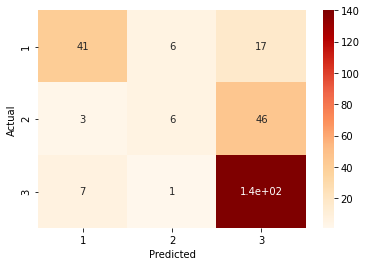

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 184 > Cofussion Matrix


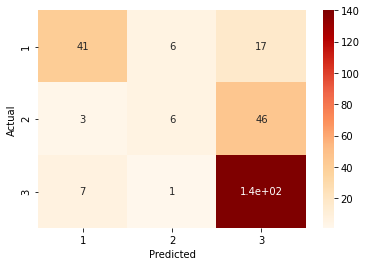

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 185 > Cofussion Matrix


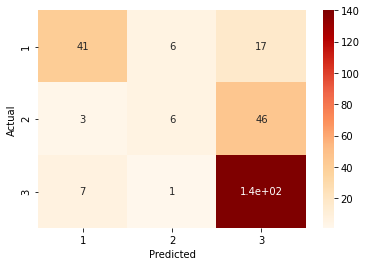

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 186 > Cofussion Matrix


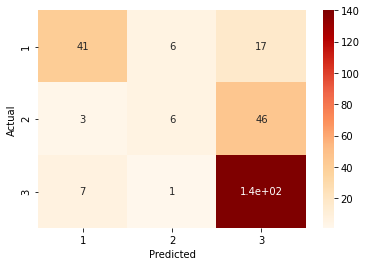

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 187 > Cofussion Matrix


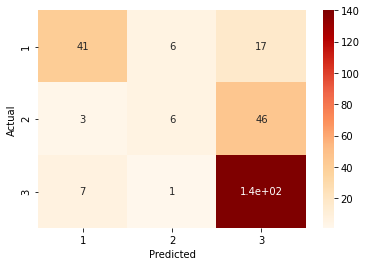

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 188 > Cofussion Matrix


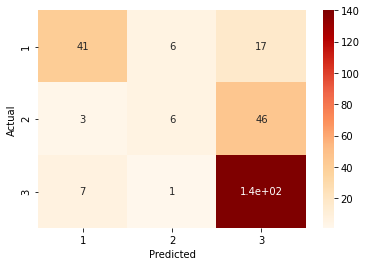

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 189 > Cofussion Matrix


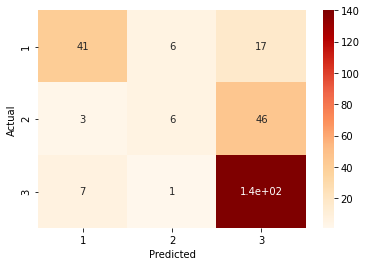

from above confussion matrix, we can see that 187 value get correct prediction,
and the others 80 miss predicted
KNN score : 0.700374531835206
----------------------------------------

< K = 190 > Cofussion Matrix


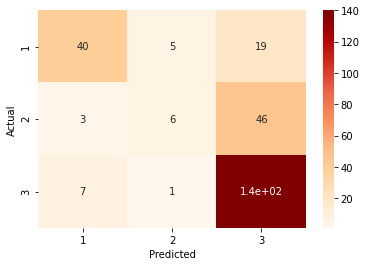

from above confussion matrix, we can see that 186 value get correct prediction,
and the others 81 miss predicted
KNN score : 0.6966292134831461
----------------------------------------

< K = 191 > Cofussion Matrix


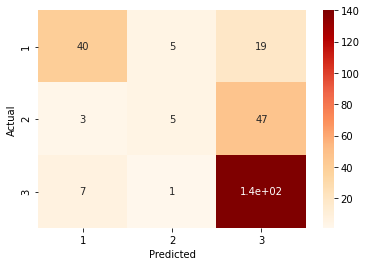

from above confussion matrix, we can see that 185 value get correct prediction,
and the others 82 miss predicted
KNN score : 0.6928838951310862
----------------------------------------

< K = 192 > Cofussion Matrix


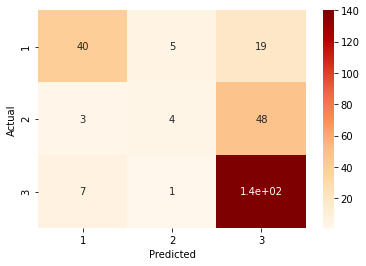

from above confussion matrix, we can see that 184 value get correct prediction,
and the others 83 miss predicted
KNN score : 0.6891385767790262
----------------------------------------

< K = 193 > Cofussion Matrix


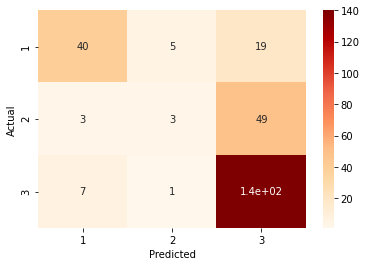

from above confussion matrix, we can see that 183 value get correct prediction,
and the others 84 miss predicted
KNN score : 0.6853932584269663
----------------------------------------

< K = 194 > Cofussion Matrix


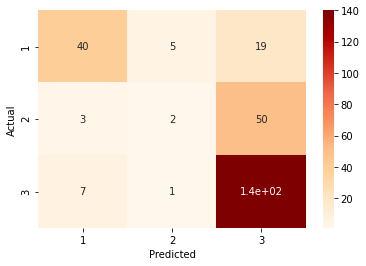

from above confussion matrix, we can see that 182 value get correct prediction,
and the others 85 miss predicted
KNN score : 0.6816479400749064
----------------------------------------

< K = 195 > Cofussion Matrix


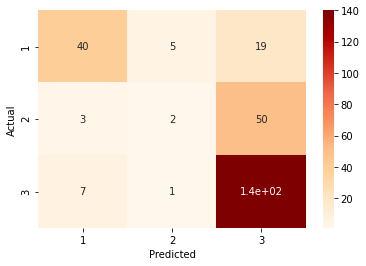

from above confussion matrix, we can see that 182 value get correct prediction,
and the others 85 miss predicted
KNN score : 0.6816479400749064
----------------------------------------

< K = 196 > Cofussion Matrix


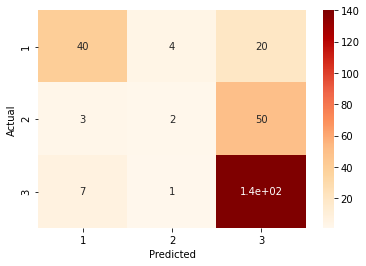

from above confussion matrix, we can see that 182 value get correct prediction,
and the others 85 miss predicted
KNN score : 0.6816479400749064
----------------------------------------

< K = 197 > Cofussion Matrix


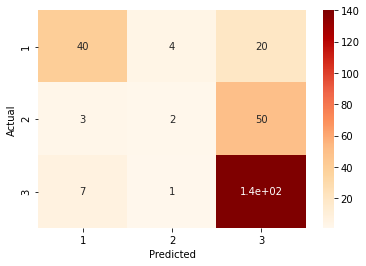

from above confussion matrix, we can see that 182 value get correct prediction,
and the others 85 miss predicted
KNN score : 0.6816479400749064
----------------------------------------

< K = 198 > Cofussion Matrix


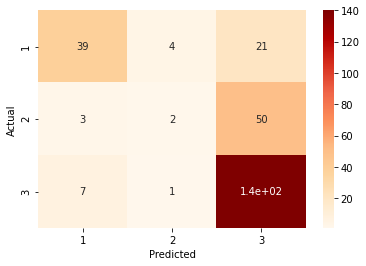

from above confussion matrix, we can see that 181 value get correct prediction,
and the others 86 miss predicted
KNN score : 0.6779026217228464
----------------------------------------

< K = 199 > Cofussion Matrix


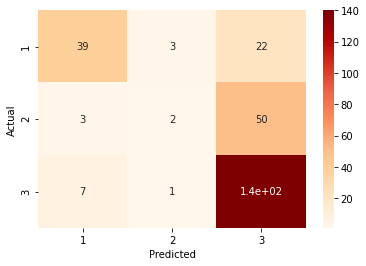

from above confussion matrix, we can see that 181 value get correct prediction,
and the others 86 miss predicted
KNN score : 0.6779026217228464
----------------------------------------

< K = 200 > Cofussion Matrix


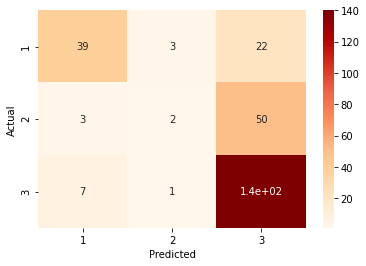

from above confussion matrix, we can see that 181 value get correct prediction,
and the others 86 miss predicted
KNN score : 0.6779026217228464
----------------------------------------

< K = 201 > Cofussion Matrix


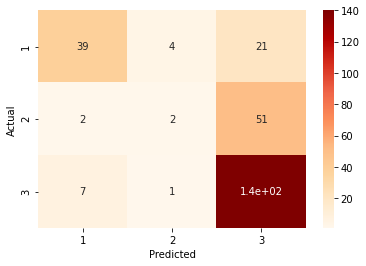

from above confussion matrix, we can see that 181 value get correct prediction,
and the others 86 miss predicted
KNN score : 0.6779026217228464
----------------------------------------

< K = 202 > Cofussion Matrix


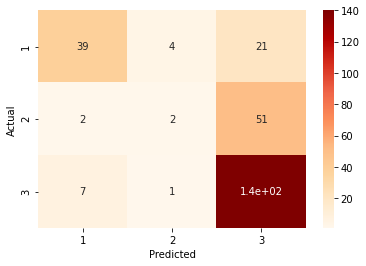

from above confussion matrix, we can see that 181 value get correct prediction,
and the others 86 miss predicted
KNN score : 0.6779026217228464
----------------------------------------

< K = 203 > Cofussion Matrix


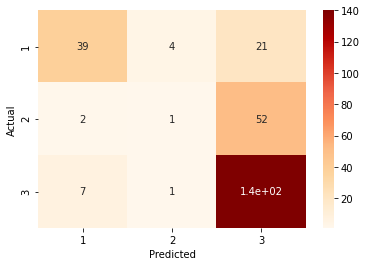

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 204 > Cofussion Matrix


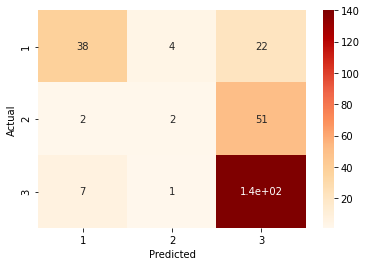

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 205 > Cofussion Matrix


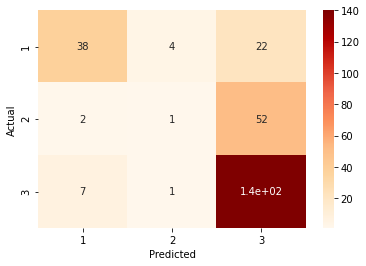

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 206 > Cofussion Matrix


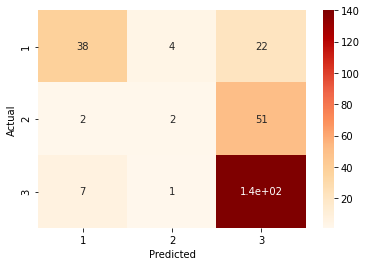

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 207 > Cofussion Matrix


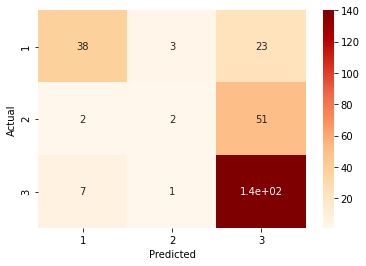

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 208 > Cofussion Matrix


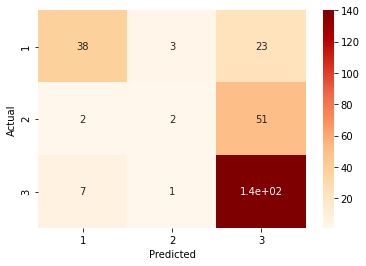

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 209 > Cofussion Matrix


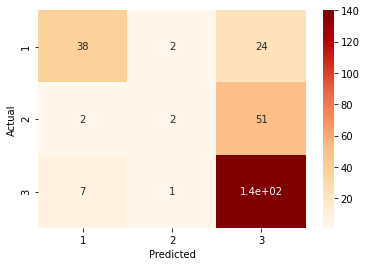

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 210 > Cofussion Matrix


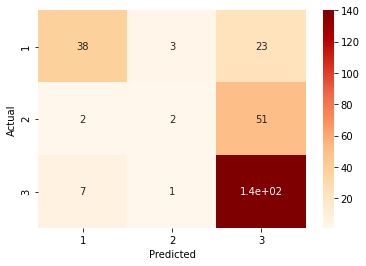

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 211 > Cofussion Matrix


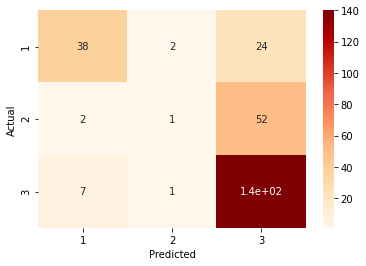

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 212 > Cofussion Matrix


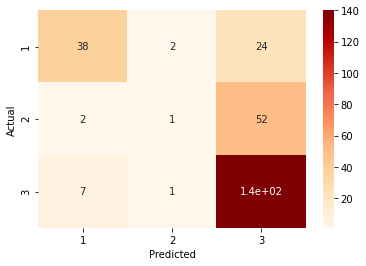

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 213 > Cofussion Matrix


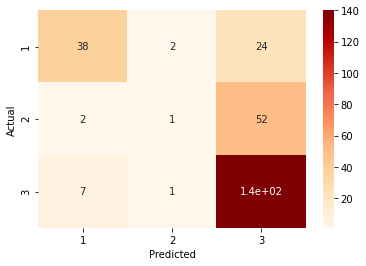

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 214 > Cofussion Matrix


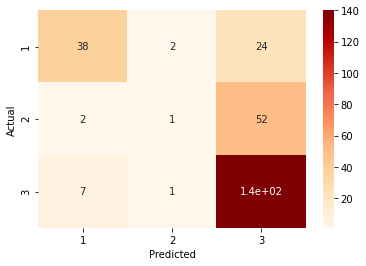

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 215 > Cofussion Matrix


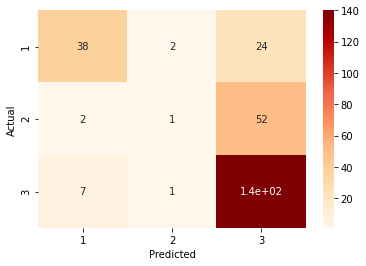

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 216 > Cofussion Matrix


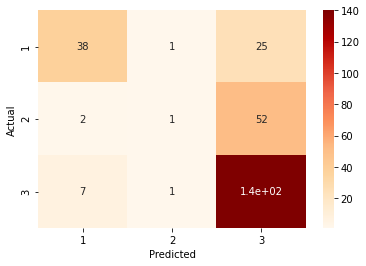

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 217 > Cofussion Matrix


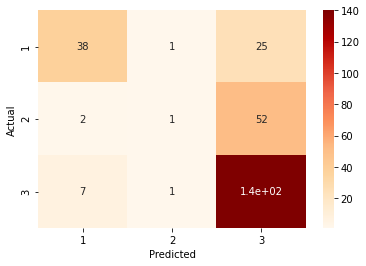

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 218 > Cofussion Matrix


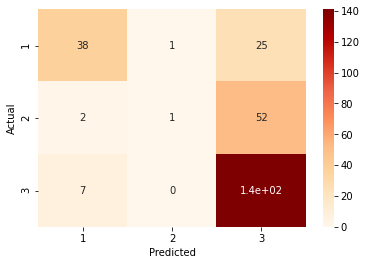

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 219 > Cofussion Matrix


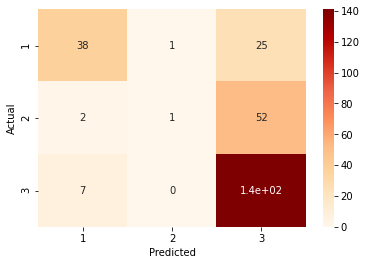

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 220 > Cofussion Matrix


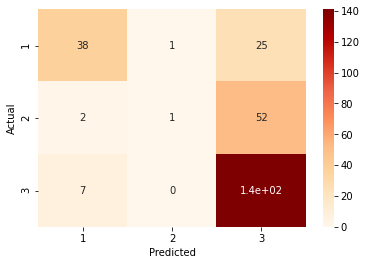

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 221 > Cofussion Matrix


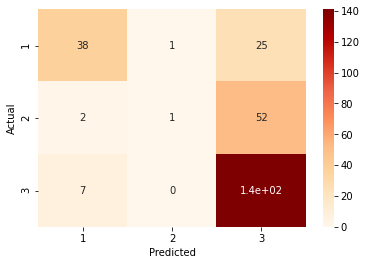

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 222 > Cofussion Matrix


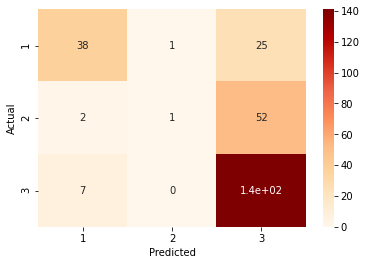

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 223 > Cofussion Matrix


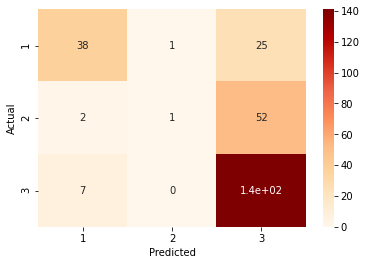

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 224 > Cofussion Matrix


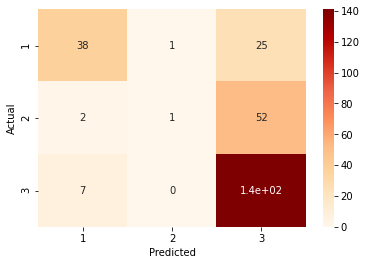

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 225 > Cofussion Matrix


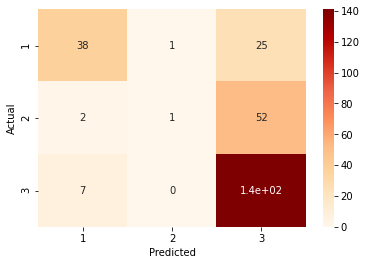

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 226 > Cofussion Matrix


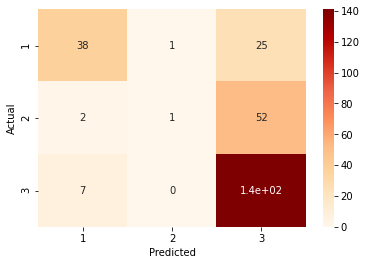

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 227 > Cofussion Matrix


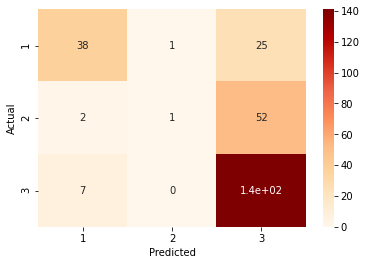

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 228 > Cofussion Matrix


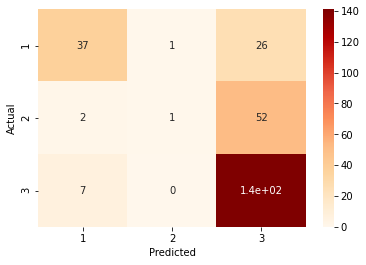

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 229 > Cofussion Matrix


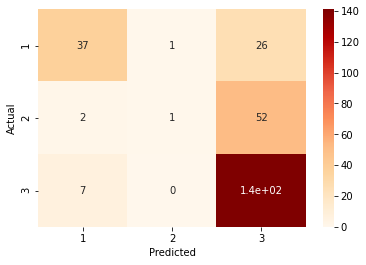

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 230 > Cofussion Matrix


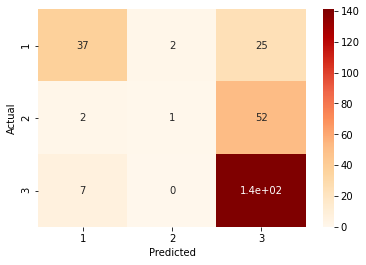

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 231 > Cofussion Matrix


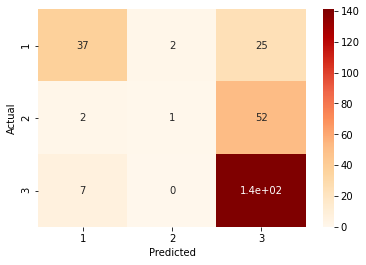

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 232 > Cofussion Matrix


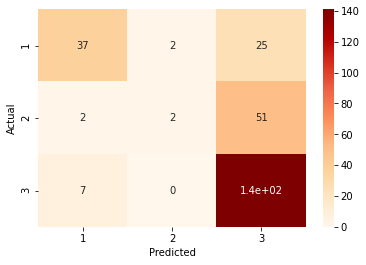

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 233 > Cofussion Matrix


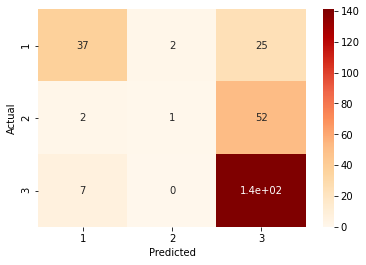

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 234 > Cofussion Matrix


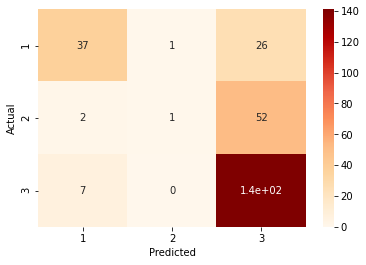

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 235 > Cofussion Matrix


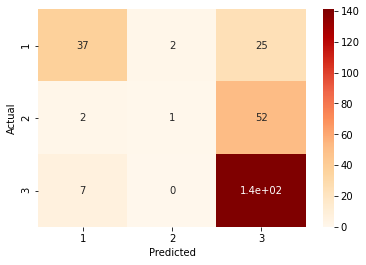

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 236 > Cofussion Matrix


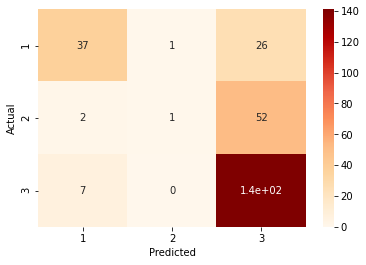

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 237 > Cofussion Matrix


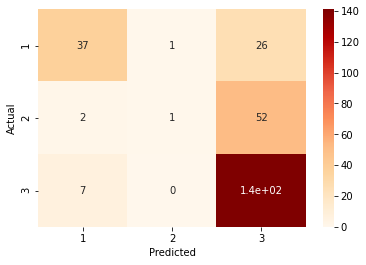

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 238 > Cofussion Matrix


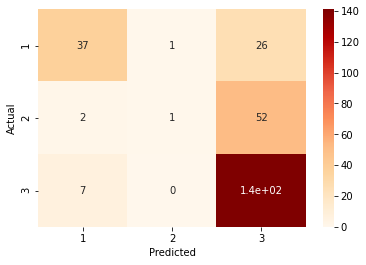

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 239 > Cofussion Matrix


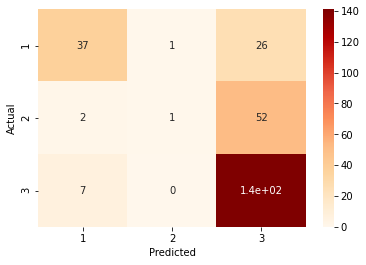

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 240 > Cofussion Matrix


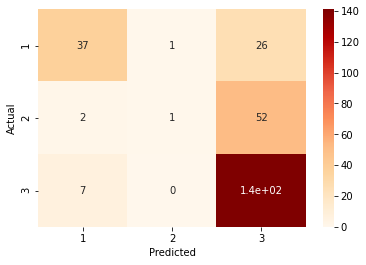

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 241 > Cofussion Matrix


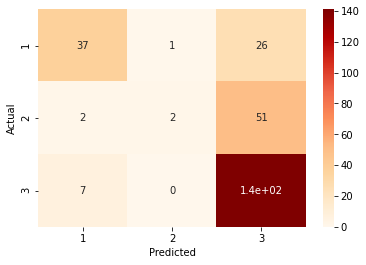

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 242 > Cofussion Matrix


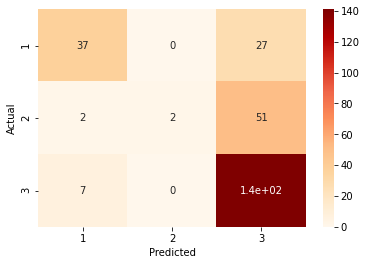

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 243 > Cofussion Matrix


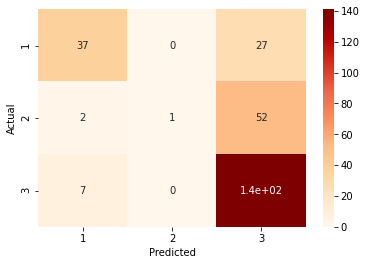

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 244 > Cofussion Matrix


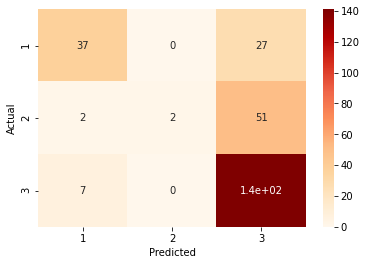

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 245 > Cofussion Matrix


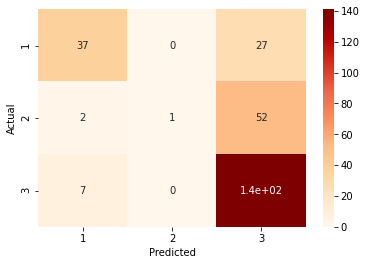

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 246 > Cofussion Matrix


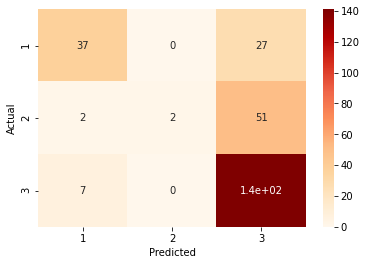

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 247 > Cofussion Matrix


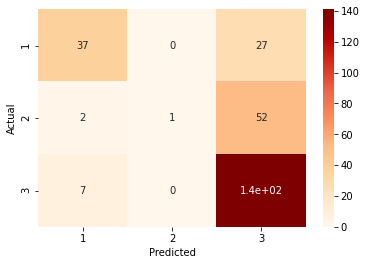

from above confussion matrix, we can see that 179 value get correct prediction,
and the others 88 miss predicted
KNN score : 0.6704119850187266
----------------------------------------

< K = 248 > Cofussion Matrix


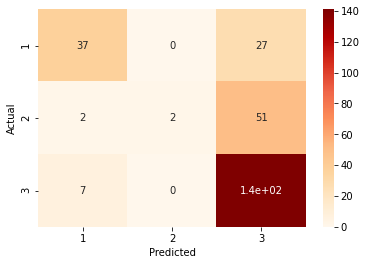

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 249 > Cofussion Matrix


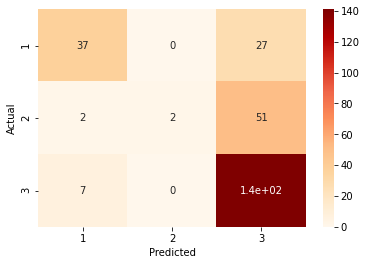

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 250 > Cofussion Matrix


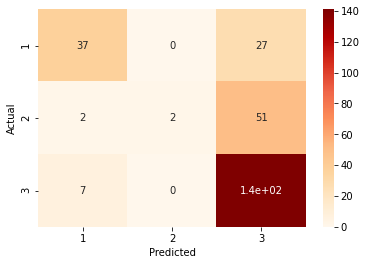

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 251 > Cofussion Matrix


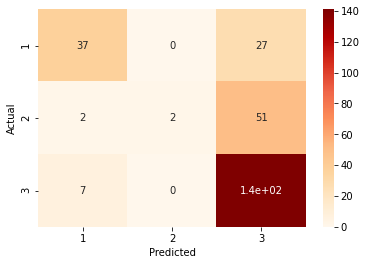

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 252 > Cofussion Matrix


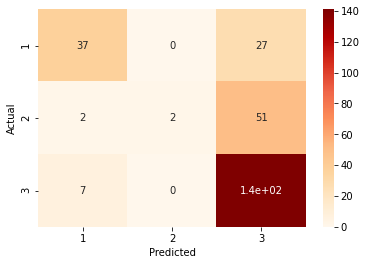

from above confussion matrix, we can see that 180 value get correct prediction,
and the others 87 miss predicted
KNN score : 0.6741573033707865
----------------------------------------

< K = 253 > Cofussion Matrix


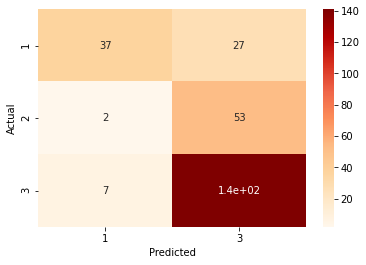

from above confussion matrix, we can see that 178 value get correct prediction,
and the others 89 miss predicted
KNN score : 0.6666666666666666
----------------------------------------

< K = 254 > Cofussion Matrix


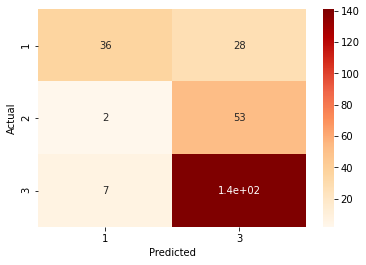

from above confussion matrix, we can see that 177 value get correct prediction,
and the others 90 miss predicted
KNN score : 0.6629213483146067
----------------------------------------

< K = 255 > Cofussion Matrix


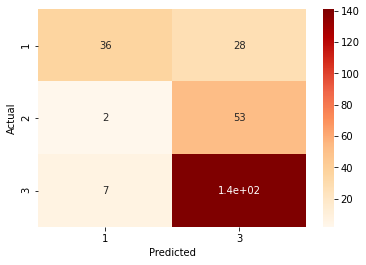

from above confussion matrix, we can see that 177 value get correct prediction,
and the others 90 miss predicted
KNN score : 0.6629213483146067
----------------------------------------

< K = 256 > Cofussion Matrix


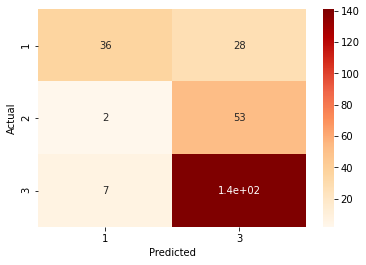

from above confussion matrix, we can see that 177 value get correct prediction,
and the others 90 miss predicted
KNN score : 0.6629213483146067
----------------------------------------

< K = 257 > Cofussion Matrix


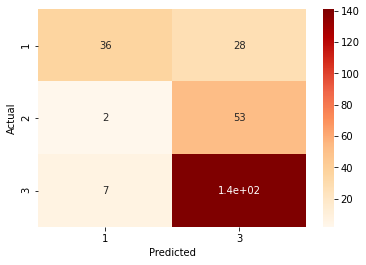

from above confussion matrix, we can see that 177 value get correct prediction,
and the others 90 miss predicted
KNN score : 0.6629213483146067
----------------------------------------

< K = 258 > Cofussion Matrix


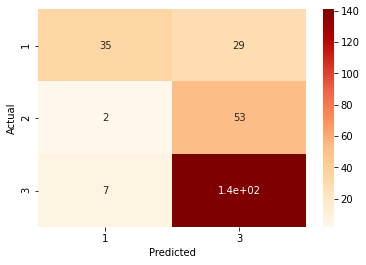

from above confussion matrix, we can see that 176 value get correct prediction,
and the others 91 miss predicted
KNN score : 0.6591760299625468
----------------------------------------

< K = 259 > Cofussion Matrix


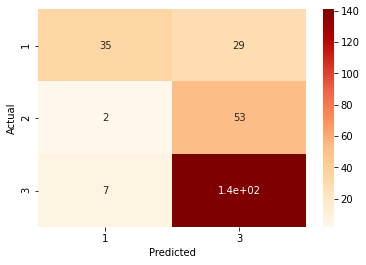

from above confussion matrix, we can see that 176 value get correct prediction,
and the others 91 miss predicted
KNN score : 0.6591760299625468
----------------------------------------

< K = 260 > Cofussion Matrix


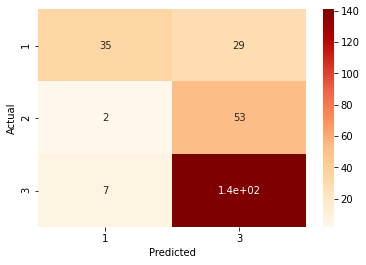

from above confussion matrix, we can see that 176 value get correct prediction,
and the others 91 miss predicted
KNN score : 0.6591760299625468
----------------------------------------

< K = 261 > Cofussion Matrix


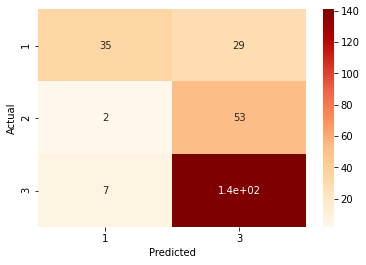

from above confussion matrix, we can see that 176 value get correct prediction,
and the others 91 miss predicted
KNN score : 0.6591760299625468
----------------------------------------

< K = 262 > Cofussion Matrix


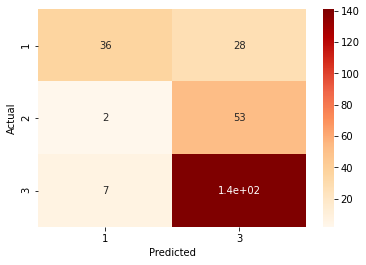

from above confussion matrix, we can see that 177 value get correct prediction,
and the others 90 miss predicted
KNN score : 0.6629213483146067
----------------------------------------

< K = 263 > Cofussion Matrix


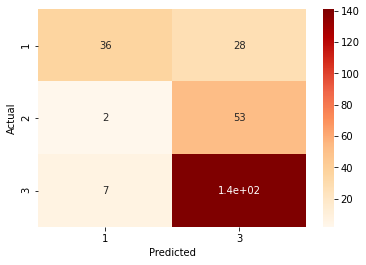

from above confussion matrix, we can see that 177 value get correct prediction,
and the others 90 miss predicted
KNN score : 0.6629213483146067
----------------------------------------

< K = 264 > Cofussion Matrix


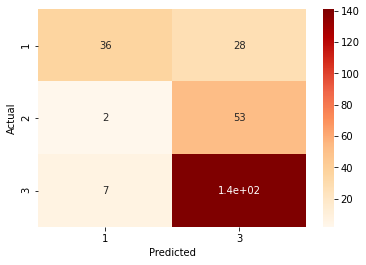

from above confussion matrix, we can see that 177 value get correct prediction,
and the others 90 miss predicted
KNN score : 0.6629213483146067
----------------------------------------

< K = 265 > Cofussion Matrix


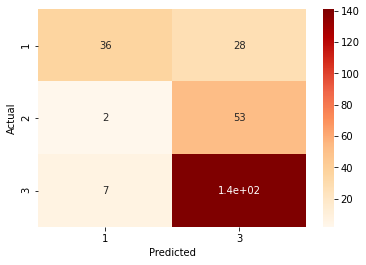

from above confussion matrix, we can see that 177 value get correct prediction,
and the others 90 miss predicted
KNN score : 0.6629213483146067
----------------------------------------

< K = 266 > Cofussion Matrix


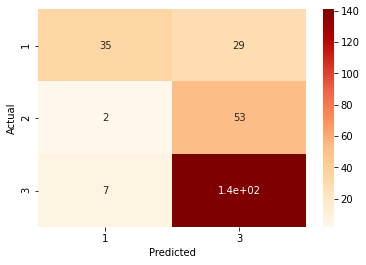

from above confussion matrix, we can see that 176 value get correct prediction,
and the others 91 miss predicted
KNN score : 0.6591760299625468
----------------------------------------

< K = 267 > Cofussion Matrix


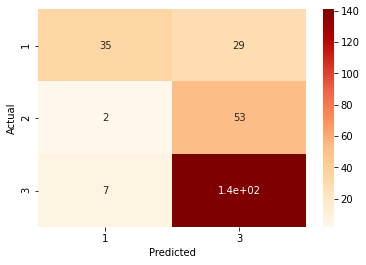

from above confussion matrix, we can see that 176 value get correct prediction,
and the others 91 miss predicted
KNN score : 0.6591760299625468
----------------------------------------



In [26]:
all_score = {}
for k in range(1, len(X_test)+1):
    score = (find_best_k(k))
    all_score[k] = score

In [38]:
df_score = pd.DataFrame({'K_value' : list(all_score.keys()), 
                         'Score' : np.array(list(all_score.values()))*100}).sort_values('Score', ascending= False)
df_score

,K_value,Score
2,3,86.891386
4,5,86.142322
0,1,85.393258
1,2,84.644195
5,6,83.520599
...,...,...
259,260,65.917603
260,261,65.917603
257,258,65.917603
265,266,65.917603


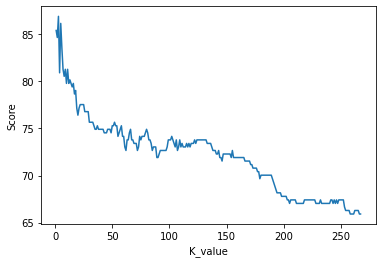

In [41]:
sns.lineplot(x = df_score.K_value, y = df_score.Score)
plt.show()

The Best K is 3, base on the df_score we can see K = 3 has the highest score.